In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import requests # required for census API
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#define all variables
#2018 percent variables
vars_pct_18_1 = ["DP04_0038PE","DP04_0040PE","DP04_0041PE","DP04_0042PE","DP04_0043PE","DP04_0044PE","DP04_0039PE","DP05_0087PE","DP05_0089PE","DP05_0088PE","DP03_0046PE","DP03_0048PE","DP03_0047PE","DP03_0049PE","DP03_0050PE","DP03_0018PE","DP03_0020PE","DP03_0019PE","DP03_0025PE","DP03_0023PE","DP03_0021PE","DP03_0022PE","DP03_0024PE","DP02_0150PE","DP02_0152PE","DP02_0151PE","DP02_0074PE","DP02_0075PE","DP02_0076PE","DP02_0077PE","DP02_0070PE","DP02_0071PE","DP02_0072PE","DP02_0073PE","DP02_0058PE","DP02_0060PE","DP02_0063PE","DP02_0064PE","DP02_0067PE","DP02_0065PE","DP02_0061PE","DP02_0066PE","DP02_0059PE","DP02_0062PE","DP03_0008PE","DP03_0009PE","DP03_0010PE","DP03_0011PE","DP03_0012PE","DP03_0013PE"]
vars_pct_18_2 = ["DP03_0016PE","DP03_0017PE","DP03_0014PE","DP03_0015PE","DP03_0001PE","DP03_0002PE","DP03_0006PE","DP03_0003PE","DP03_0004PE","DP03_0005PE","DP03_0007PE","DP02_0036PE","DP02_0040PE","DP02_0039PE","DP02_0041PE","DP02_0042PE","DP02_0037PE","DP02_0038PE","DP02_0043PE","DP02_0044PE","DP02_0046PE","DP02_0047PE","DP02_0048PE","DP02_0045PE","DP02_0049PE","DP02_0050PE","DP02_0051PE","DP04_0136PE","DP04_0138PE","DP04_0139PE","DP04_0140PE","DP04_0141PE","DP04_0142PE","DP04_0137PE","DP04_0143PE","DP04_0126PE","DP04_0129PE","DP04_0130PE","DP04_0131PE","DP04_0132PE","DP04_0133PE","DP04_0128PE","DP04_0127PE","DP04_0134PE","DP04_0135PE","DP03_0095PE","DP03_0102PE","DP03_0103PE","DP03_0104PE","DP03_0108PE"]
vars_pct_18_3 = ["DP03_0105PE","DP03_0106PE","DP03_0107PE","DP03_0109PE","DP03_0113PE","DP03_0110PE","DP03_0111PE","DP03_0112PE","DP03_0114PE","DP03_0118PE","DP03_0115PE","DP03_0116PE","DP03_0117PE","DP03_0100PE","DP03_0101PE","DP03_0099PE","DP03_0096PE","DP03_0097PE","DP03_0098PE","DP05_0070PE","DP05_0071PE","DP05_0074PE","DP05_0072PE","DP05_0075PE","DP05_0073PE","DP05_0076PE","DP05_0079PE","DP05_0080PE","DP05_0078PE","DP05_0081PE","DP05_0082PE","DP05_0083PE","DP05_0085PE","DP05_0084PE","DP05_0077PE","DP04_0062PE","DP04_0064PE","DP04_0067PE","DP04_0065PE","DP04_0066PE","DP04_0071PE","DP04_0070PE","DP04_0069PE","DP04_0063PE","DP04_0068PE","DP02_0001PE","DP02_0016PE","DP02_0015PE","DP02_0002PE","DP02_0008PE"]
vars_pct_18_4 = ["DP02_0009PE","DP02_0006PE","DP02_0007PE","DP02_0004PE","DP02_0005PE","DP02_0003PE","DP02_0014PE","DP02_0013PE","DP02_0010PE","DP02_0011PE","DP02_0012PE","DP04_0001PE","DP04_0004PE","DP04_0002PE","DP04_0005PE","DP04_0003PE","DP04_0045PE","DP04_0048PE","DP04_0049PE","DP04_0046PE","DP04_0047PE","DP03_0075PE","DP03_0077PE","DP03_0083PE","DP03_0078PE","DP03_0084PE","DP03_0085PE","DP03_0079PE","DP03_0080PE","DP03_0081PE","DP03_0082PE","DP03_0076PE","DP03_0087PE","DP03_0086PE","DP03_0094PE","DP03_0093PE","DP03_0092PE","DP03_0089PE","DP03_0091PE","DP03_0090PE","DP03_0088PE","DP03_0051PE","DP03_0053PE","DP03_0059PE","DP03_0054PE","DP03_0060PE","DP03_0061PE","DP03_0055PE","DP03_0056PE","DP03_0057PE"]
vars_pct_18_5 = ["DP03_0058PE","DP03_0052PE","DP03_0063PE","DP03_0062PE","DP03_0072PE","DP03_0073PE","DP03_0064PE","DP03_0065PE","DP03_0074PE","DP03_0068PE","DP03_0069PE","DP03_0066PE","DP03_0067PE","DP03_0070PE","DP03_0071PE","DP03_0032PE","DP03_0033PE","DP03_0043PE","DP03_0034PE","DP03_0042PE","DP03_0040PE","DP03_0039PE","DP03_0035PE","DP03_0044PE","DP03_0041PE","DP03_0045PE","DP03_0037PE","DP03_0038PE","DP03_0036PE","DP02_0030PE","DP02_0035PE","DP02_0031PE","DP02_0032PE","DP02_0033PE","DP02_0034PE","DP02_0024PE","DP02_0029PE","DP02_0025PE","DP02_0026PE","DP02_0027PE","DP02_0028PE","DP04_0090PE","DP04_0091PE","DP04_0092PE","DP04_0076PE","DP04_0077PE","DP04_0078PE","DP04_0079PE","DP03_0026PE","DP03_0027PE"]
vars_pct_18_6 = ["DP03_0030PE","DP03_0031PE","DP03_0029PE","DP03_0028PE","DP03_0119PE","DP03_0120PE","DP03_0121PE","DP03_0128PE","DP03_0133PE","DP03_0134PE","DP03_0135PE","DP03_0129PE","DP03_0130PE","DP03_0132PE","DP03_0131PE","DP03_0125PE","DP03_0126PE","DP03_0127PE","DP03_0122PE","DP03_0123PE","DP03_0124PE","DP03_0136PE","DP03_0137PE","DP02_0086PE","DP02_0092PE","DP02_0087PE","DP02_0091PE","DP02_0088PE","DP02_0090PE","DP02_0089PE","DP05_0063PE","DP05_0066PE","DP05_0067PE","DP05_0065PE","DP05_0068PE","DP05_0069PE","DP05_0064PE","DP05_0033PE","DP05_0034PE","DP05_0036PE","DP05_0039PE","DP05_0040PE","DP05_0041PE","DP05_0042PE","DP05_0043PE","DP05_0044PE","DP05_0045PE","DP05_0046PE","DP05_0047PE","DP05_0048PE"]
vars_pct_18_7 = ["DP05_0049PE","DP05_0051PE","DP05_0050PE","DP05_0038PE","DP05_0052PE","DP05_0054PE","DP05_0053PE","DP05_0056PE","DP05_0055PE","DP05_0057PE","DP05_0037PE","DP05_0035PE","DP05_0058PE","DP05_0062PE","DP05_0060PE","DP05_0061PE","DP05_0059PE","DP02_0017PE","DP02_0020PE","DP02_0018PE","DP02_0022PE","DP02_0023PE","DP02_0021PE","DP02_0019PE","DP02_0078PE","DP02_0085PE","DP02_0080PE","DP02_0082PE","DP02_0084PE","DP02_0083PE","DP02_0081PE","DP02_0079PE","DP04_0027PE","DP04_0028PE","DP04_0029PE","DP04_0030PE","DP04_0031PE","DP04_0032PE","DP04_0033PE","DP04_0034PE","DP04_0035PE","DP04_0036PE","DP04_0037PE","DP02_0052PE","DP02_0057PE","DP02_0055PE","DP02_0056PE","DP02_0054PE","DP02_0053PE","DP04_0072PE"]
vars_pct_18_8 = ["DP04_0074PE","DP04_0073PE","DP04_0075PE","DP04_0093PE","DP04_0096PE","DP04_0097PE","DP04_0098PE","DP04_0099PE","DP04_0100PE","DP04_0095PE","DP04_0094PE","DP04_0101PE","DP04_0102PE","DP04_0108PE","DP04_0104PE","DP04_0105PE","DP04_0106PE","DP04_0107PE","DP04_0103PE","DP04_0109PE","DP04_0117PE","DP04_0119PE","DP04_0120PE","DP04_0121PE","DP04_0122PE","DP04_0123PE","DP04_0124PE","DP04_0118PE","DP04_0125PE","DP04_0110PE","DP04_0112PE","DP04_0113PE","DP04_0114PE","DP04_0115PE","DP04_0111PE","DP04_0116PE","DP05_0001PE","DP05_0007PE","DP05_0008PE","DP05_0020PE","DP05_0021PE","DP05_0009PE","DP05_0022PE","DP05_0010PE","DP05_0011PE","DP05_0012PE","DP05_0006PE","DP05_0013PE","DP05_0014PE","DP05_0023PE"]
vars_pct_18_9 = ["DP05_0015PE","DP05_0024PE","DP05_0016PE","DP05_0017PE","DP05_0018PE","DP05_0004PE","DP05_0019PE","DP05_0005PE","DP05_0086PE","DP02_0093PE","DP02_0094PE","DP02_0095PE","DP04_0006PE","DP04_0008PE","DP04_0007PE","DP04_0012PE","DP04_0009PE","DP04_0013PE","DP04_0010PE","DP04_0011PE","DP04_0015PE","DP04_0014PE","DP04_0080PE","DP04_0088PE","DP04_0083PE","DP04_0084PE","DP04_0085PE","DP04_0086PE","DP04_0082PE","DP04_0087PE","DP04_0081PE","DP04_0089PE","DP04_0057PE","DP04_0059PE","DP04_0060PE","DP04_0061PE","DP04_0058PE","DP02_0068PE","DP02_0069PE","DP02_0103PE","DP02_0106PE","DP02_0105PE","DP02_0104PE","DP02_0108PE","DP02_0109PE","DP02_0107PE","DP04_0050PE","DP04_0056PE","DP04_0055PE","DP04_0054PE"]
vars_pct_18_10 = ["DP04_0053PE","DP04_0052PE","DP04_0051PE","DP04_0016PE","DP04_0026PE","DP04_0025PE","DP04_0024PE","DP04_0023PE","DP04_0022PE","DP04_0021PE","DP04_0020PE","DP04_0019PE","DP04_0018PE","DP04_0017PE"]



#2018 estimate variables
vars_est_18_1 = ["DP04_0040E","DP04_0041E","DP04_0042E","DP04_0043E","DP04_0044E","DP04_0039E","DP05_0087E","DP05_0089E","DP05_0088E","DP03_0046E","DP03_0048E","DP03_0047E","DP03_0049E","DP03_0050E","DP03_0018E","DP03_0020E","DP03_0019E","DP03_0025E","DP03_0023E","DP03_0021E","DP03_0022E","DP03_0024E","DP02_0150E","DP02_0152E","DP02_0151E","DP02_0074E","DP02_0075E","DP02_0076E","DP02_0077E","DP02_0070E","DP02_0071E","DP02_0072E","DP02_0073E","DP02_0058E","DP02_0060E","DP02_0063E","DP02_0064E","DP02_0067E","DP02_0065E","DP02_0061E","DP02_0066E","DP02_0059E","DP02_0062E","DP03_0008E","DP03_0009E","DP03_0010E","DP03_0011E","DP03_0012E","DP03_0013E","DP03_0016E"]
vars_est_18_2 = ["DP03_0017E","DP03_0014E","DP03_0015E","DP03_0001E","DP03_0002E","DP03_0006E","DP03_0003E","DP03_0004E","DP03_0005E","DP03_0007E","DP02_0036E","DP02_0040E","DP02_0039E","DP02_0041E","DP02_0042E","DP02_0037E","DP02_0038E","DP02_0043E","DP02_0044E","DP02_0046E","DP02_0047E","DP02_0048E","DP02_0045E","DP02_0049E","DP02_0050E","DP02_0051E","DP04_0136E","DP04_0138E","DP04_0139E","DP04_0140E","DP04_0141E","DP04_0142E","DP04_0137E","DP04_0143E","DP04_0126E","DP04_0129E","DP04_0130E","DP04_0131E","DP04_0132E","DP04_0133E","DP04_0128E","DP04_0127E","DP04_0134E","DP04_0135E","DP03_0095E","DP03_0102E","DP03_0103E","DP03_0104E","DP03_0108E","DP03_0105E"]
vars_est_18_3 = ["DP03_0106E","DP03_0107E","DP03_0109E","DP03_0113E","DP03_0110E","DP03_0111E","DP03_0112E","DP03_0114E","DP03_0118E","DP03_0115E","DP03_0116E","DP03_0117E","DP03_0100E","DP03_0101E","DP03_0099E","DP03_0096E","DP03_0097E","DP03_0098E","DP05_0070E","DP05_0071E","DP05_0074E","DP05_0072E","DP05_0075E","DP05_0073E","DP05_0076E","DP05_0079E","DP05_0080E","DP05_0078E","DP05_0081E","DP05_0082E","DP05_0083E","DP05_0085E","DP05_0084E","DP05_0077E","DP04_0062E","DP04_0064E","DP04_0067E","DP04_0065E","DP04_0066E","DP04_0071E","DP04_0070E","DP04_0069E","DP04_0063E","DP04_0068E","DP02_0001E","DP02_0016E","DP02_0015E","DP02_0002E","DP02_0008E","DP02_0009E"]
vars_est_18_4 = ["DP02_0006E","DP02_0007E","DP02_0004E","DP02_0005E","DP02_0003E","DP02_0014E","DP02_0013E","DP02_0010E","DP02_0011E","DP02_0012E","DP04_0001E","DP04_0004E","DP04_0002E","DP04_0005E","DP04_0003E","DP04_0045E","DP04_0048E","DP04_0049E","DP04_0046E","DP04_0047E","DP03_0075E","DP03_0077E","DP03_0083E","DP03_0078E","DP03_0084E","DP03_0085E","DP03_0079E","DP03_0080E","DP03_0081E","DP03_0082E","DP03_0076E","DP03_0087E","DP03_0086E","DP03_0094E","DP03_0093E","DP03_0092E","DP03_0089E","DP03_0091E","DP03_0090E","DP03_0088E","DP03_0051E","DP03_0053E","DP03_0059E","DP03_0054E","DP03_0060E","DP03_0061E","DP03_0055E","DP03_0056E","DP03_0057E","DP03_0058E"]
vars_est_18_5 = ["DP03_0052E","DP03_0063E","DP03_0062E","DP03_0072E","DP03_0073E","DP03_0064E","DP03_0065E","DP03_0074E","DP03_0068E","DP03_0069E","DP03_0066E","DP03_0067E","DP03_0070E","DP03_0071E","DP03_0032E","DP03_0033E","DP03_0043E","DP03_0034E","DP03_0042E","DP03_0040E","DP03_0039E","DP03_0035E","DP03_0044E","DP03_0041E","DP03_0045E","DP03_0037E","DP03_0038E","DP03_0036E","DP02_0030E","DP02_0035E","DP02_0031E","DP02_0032E","DP02_0033E","DP02_0034E","DP02_0024E","DP02_0029E","DP02_0025E","DP02_0026E","DP02_0027E","DP02_0028E","DP04_0090E","DP04_0091E","DP04_0092E","DP04_0076E","DP04_0077E","DP04_0078E","DP04_0079E","DP03_0026E","DP03_0027E","DP03_0030E"]
vars_est_18_6 = ["DP03_0031E","DP03_0029E","DP03_0028E","DP03_0119E","DP03_0120E","DP03_0121E","DP03_0128E","DP03_0133E","DP03_0134E","DP03_0135E","DP03_0129E","DP03_0130E","DP03_0132E","DP03_0131E","DP03_0125E","DP03_0126E","DP03_0127E","DP03_0122E","DP03_0123E","DP03_0124E","DP03_0136E","DP03_0137E","DP02_0086E","DP02_0092E","DP02_0087E","DP02_0091E","DP02_0088E","DP02_0090E","DP02_0089E","DP05_0063E","DP05_0066E","DP05_0067E","DP05_0065E","DP05_0068E","DP05_0069E","DP05_0064E","DP05_0033E","DP05_0034E","DP05_0036E","DP05_0039E","DP05_0040E","DP05_0041E","DP05_0042E","DP05_0043E","DP05_0044E","DP05_0045E","DP05_0046E","DP05_0047E","DP05_0048E","DP05_0049E"]
vars_est_18_7 = ["DP05_0051E","DP05_0050E","DP05_0038E","DP05_0052E","DP05_0054E","DP05_0053E","DP05_0056E","DP05_0055E","DP05_0057E","DP05_0037E","DP05_0035E","DP05_0058E","DP05_0062E","DP05_0060E","DP05_0061E","DP05_0059E","DP02_0017E","DP02_0020E","DP02_0018E","DP02_0022E","DP02_0023E","DP02_0021E","DP02_0019E","DP02_0078E","DP02_0085E","DP02_0080E","DP02_0082E","DP02_0084E","DP02_0083E","DP02_0081E","DP02_0079E","DP04_0027E","DP04_0028E","DP04_0029E","DP04_0030E","DP04_0031E","DP04_0032E","DP04_0033E","DP04_0034E","DP04_0035E","DP04_0036E","DP04_0037E","DP02_0052E","DP02_0057E","DP02_0055E","DP02_0056E","DP02_0054E","DP02_0053E","DP04_0072E","DP04_0074E"]
vars_est_18_8 = ["DP04_0073E","DP04_0075E","DP04_0093E","DP04_0096E","DP04_0097E","DP04_0098E","DP04_0099E","DP04_0100E","DP04_0095E","DP04_0094E","DP04_0101E","DP04_0102E","DP04_0108E","DP04_0104E","DP04_0105E","DP04_0106E","DP04_0107E","DP04_0103E","DP04_0109E","DP04_0117E","DP04_0119E","DP04_0120E","DP04_0121E","DP04_0122E","DP04_0123E","DP04_0124E","DP04_0118E","DP04_0125E","DP04_0110E","DP04_0112E","DP04_0113E","DP04_0114E","DP04_0115E","DP04_0111E","DP04_0116E","DP05_0001E","DP05_0007E","DP05_0008E","DP05_0020E","DP05_0021E","DP05_0009E","DP05_0022E","DP05_0010E","DP05_0011E","DP05_0012E","DP05_0006E","DP05_0013E","DP05_0014E","DP05_0023E","DP05_0015E"]
vars_est_18_9 = ["DP05_0024E","DP05_0016E","DP05_0017E","DP05_0018E","DP05_0004E","DP05_0019E","DP05_0005E","DP05_0086E","DP02_0093E","DP02_0094E","DP02_0095E","DP04_0006E","DP04_0008E","DP04_0007E","DP04_0012E","DP04_0009E","DP04_0013E","DP04_0010E","DP04_0011E","DP04_0015E","DP04_0014E","DP04_0080E","DP04_0088E","DP04_0083E","DP04_0084E","DP04_0085E","DP04_0086E","DP04_0082E","DP04_0087E","DP04_0081E","DP04_0089E","DP04_0057E","DP04_0059E","DP04_0060E","DP04_0061E","DP04_0058E","DP02_0068E","DP02_0069E","DP02_0103E","DP02_0106E","DP02_0105E","DP02_0104E","DP02_0108E","DP02_0109E","DP02_0107E","DP04_0050E","DP04_0056E","DP04_0055E","DP04_0054E","DP04_0053E"]
vars_est_18_10 = ["DP04_0052E","DP04_0051E","DP04_0016E","DP04_0026E","DP04_0025E","DP04_0024E","DP04_0023E","DP04_0022E","DP04_0021E","DP04_0020E","DP04_0019E","DP04_0018E","DP04_0017E"]


#2015 percent variables
vars_pct_15_1 = ["DP04_0040PE","DP04_0041PE","DP04_0042PE","DP04_0043PE","DP04_0044PE","DP04_0039PE","DP05_0082PE","DP05_0084PE","DP05_0083PE","DP03_0046PE","DP03_0048PE","DP03_0047PE","DP03_0049PE","DP03_0050PE","DP03_0025PE","DP03_0018PE","DP03_0020PE","DP03_0019PE","DP03_0023PE","DP03_0021PE","DP03_0022PE","DP03_0024PE","DP02_0150PE","DP02_0152PE","DP02_0151PE","DP02_0074PE","DP02_0075PE","DP02_0076PE","DP02_0077PE","DP02_0070PE","DP02_0071PE","DP02_0072PE","DP02_0073PE","DP02_0067PE","DP02_0066PE","DP02_0058PE","DP02_0060PE","DP02_0063PE","DP02_0064PE","DP02_0065PE","DP02_0061PE","DP02_0059PE","DP02_0062PE","DP03_0008PE","DP03_0009PE","DP03_0010PE","DP03_0011PE","DP03_0012PE","DP03_0013PE","DP03_0016PE"]
vars_pct_15_2 = ["DP03_0017PE","DP03_0014PE","DP03_0015PE","DP03_0001PE","DP03_0002PE","DP03_0006PE","DP03_0003PE","DP03_0004PE","DP03_0005PE","DP03_0007PE","DP02_0036PE","DP02_0040PE","DP02_0039PE","DP02_0041PE","DP02_0042PE","DP02_0037PE","DP02_0038PE","DP02_0043PE","DP02_0044PE","DP02_0046PE","DP02_0047PE","DP02_0048PE","DP02_0045PE","DP02_0049PE","DP02_0050PE","DP02_0051PE","DP04_0143PE","DP04_0136PE","DP04_0138PE","DP04_0139PE","DP04_0140PE","DP04_0141PE","DP04_0142PE","DP04_0137PE","DP04_0135PE","DP04_0126PE","DP04_0129PE","DP04_0130PE","DP04_0131PE","DP04_0132PE","DP04_0133PE","DP04_0128PE","DP04_0127PE","DP04_0134PE","DP03_0095PE","DP03_0102PE","DP03_0103PE","DP03_0104PE","DP03_0108PE","DP03_0105PE"]
vars_pct_15_3 = ["DP03_0106PE","DP03_0107PE","DP03_0109PE","DP03_0113PE","DP03_0110PE","DP03_0111PE","DP03_0112PE","DP03_0114PE","DP03_0118PE","DP03_0115PE","DP03_0116PE","DP03_0117PE","DP03_0100PE","DP03_0101PE","DP03_0099PE","DP03_0096PE","DP03_0097PE","DP03_0098PE","DP05_0065PE","DP05_0066PE","DP05_0069PE","DP05_0067PE","DP05_0070PE","DP05_0068PE","DP05_0071PE","DP05_0074PE","DP05_0075PE","DP05_0073PE","DP05_0076PE","DP05_0077PE","DP05_0078PE","DP05_0080PE","DP05_0079PE","DP05_0072PE","DP04_0062PE","DP04_0064PE","DP04_0067PE","DP04_0065PE","DP04_0066PE","DP04_0071PE","DP04_0070PE","DP04_0069PE","DP04_0063PE","DP04_0068PE","DP02_0016PE","DP02_0015PE","DP02_0014PE","DP02_0013PE","DP02_0001PE","DP02_0002PE"]
vars_pct_15_4 = ["DP02_0008PE","DP02_0009PE","DP02_0006PE","DP02_0007PE","DP02_0004PE","DP02_0005PE","DP02_0003PE","DP02_0010PE","DP02_0011PE","DP02_0012PE","DP04_0004PE","DP04_0005PE","DP04_0001PE","DP04_0002PE","DP04_0003PE","DP04_0048PE","DP04_0049PE","DP04_0045PE","DP04_0046PE","DP04_0047PE","DP03_0075PE","DP03_0077PE","DP03_0083PE","DP03_0078PE","DP03_0084PE","DP03_0085PE","DP03_0079PE","DP03_0080PE","DP03_0081PE","DP03_0082PE","DP03_0076PE","DP03_0087PE","DP03_0086PE","DP03_0094PE","DP03_0093PE","DP03_0092PE","DP03_0089PE","DP03_0091PE","DP03_0090PE","DP03_0088PE","DP03_0051PE","DP03_0053PE","DP03_0059PE","DP03_0054PE","DP03_0060PE","DP03_0061PE","DP03_0055PE","DP03_0056PE","DP03_0057PE","DP03_0058PE"]
vars_pct_15_5 = ["DP03_0052PE","DP03_0063PE","DP03_0062PE","DP03_0072PE","DP03_0073PE","DP03_0064PE","DP03_0065PE","DP03_0074PE","DP03_0068PE","DP03_0069PE","DP03_0066PE","DP03_0067PE","DP03_0070PE","DP03_0071PE","DP03_0032PE","DP03_0033PE","DP03_0043PE","DP03_0034PE","DP03_0042PE","DP03_0040PE","DP03_0039PE","DP03_0035PE","DP03_0044PE","DP03_0041PE","DP03_0045PE","DP03_0037PE","DP03_0038PE","DP03_0036PE","DP02_0030PE","DP02_0035PE","DP02_0031PE","DP02_0032PE","DP02_0033PE","DP02_0034PE","DP02_0024PE","DP02_0029PE","DP02_0025PE","DP02_0026PE","DP02_0027PE","DP02_0028PE","DP04_0090PE","DP04_0091PE","DP04_0092PE","DP04_0076PE","DP04_0077PE","DP04_0078PE","DP04_0079PE","DP03_0026PE","DP03_0027PE","DP03_0030PE"]
vars_pct_15_6 = ["DP03_0031PE","DP03_0029PE","DP03_0028PE","DP03_0134PE","DP03_0133PE","DP03_0135PE","DP03_0136PE","DP03_0137PE","DP03_0119PE","DP03_0120PE","DP03_0121PE","DP03_0128PE","DP03_0125PE","DP03_0126PE","DP03_0127PE","DP03_0122PE","DP03_0123PE","DP03_0124PE","DP03_0129PE","DP03_0130PE","DP03_0132PE","DP03_0131PE","DP02_0086PE","DP02_0092PE","DP02_0087PE","DP02_0091PE","DP02_0088PE","DP02_0090PE","DP02_0089PE","DP05_0031PE","DP05_0034PE","DP05_0035PE","DP05_0036PE","DP05_0037PE","DP05_0038PE","DP05_0039PE","DP05_0040PE","DP05_0041PE","DP05_0042PE","DP05_0043PE","DP05_0044PE","DP05_0046PE","DP05_0045PE","DP05_0033PE","DP05_0047PE","DP05_0049PE","DP05_0048PE","DP05_0051PE","DP05_0050PE","DP05_0052PE"]
vars_pct_15_7 = ["DP05_0032PE","DP05_0058PE","DP05_0061PE","DP05_0062PE","DP05_0060PE","DP05_0063PE","DP05_0064PE","DP05_0059PE","DP05_0028PE","DP05_0029PE","DP05_0030PE","DP05_0053PE","DP05_0057PE","DP05_0055PE","DP05_0056PE","DP05_0054PE","DP02_0017PE","DP02_0020PE","DP02_0018PE","DP02_0022PE","DP02_0023PE","DP02_0021PE","DP02_0019PE","DP02_0078PE","DP02_0085PE","DP02_0080PE","DP02_0082PE","DP02_0084PE","DP02_0083PE","DP02_0081PE","DP02_0079PE","DP04_0027PE","DP04_0028PE","DP04_0029PE","DP04_0030PE","DP04_0031PE","DP04_0032PE","DP04_0033PE","DP04_0034PE","DP04_0035PE","DP04_0036PE","DP04_0037PE","DP02_0052PE","DP02_0057PE","DP02_0055PE","DP02_0056PE","DP02_0054PE","DP02_0053PE","DP04_0072PE","DP04_0074PE"]
vars_pct_15_8 = ["DP04_0073PE","DP04_0075PE","DP04_0093PE","DP04_0096PE","DP04_0097PE","DP04_0098PE","DP04_0099PE","DP04_0100PE","DP04_0095PE","DP04_0094PE","DP04_0101PE","DP04_0102PE","DP04_0108PE","DP04_0104PE","DP04_0105PE","DP04_0106PE","DP04_0107PE","DP04_0103PE","DP04_0109PE","DP04_0117PE","DP04_0119PE","DP04_0120PE","DP04_0121PE","DP04_0122PE","DP04_0123PE","DP04_0124PE","DP04_0118PE","DP04_0110PE","DP04_0112PE","DP04_0113PE","DP04_0114PE","DP04_0115PE","DP04_0111PE","DP04_0116PE","DP04_0125PE","DP05_0006PE","DP05_0007PE","DP05_0018PE","DP05_0022PE","DP05_0024PE","DP05_0023PE","DP05_0008PE","DP05_0019PE","DP05_0009PE","DP05_0010PE","DP05_0011PE","DP05_0005PE","DP05_0012PE","DP05_0013PE","DP05_0020PE"]
vars_pct_15_9 = ["DP05_0014PE","DP05_0021PE","DP05_0025PE","DP05_0027PE","DP05_0026PE","DP05_0015PE","DP05_0016PE","DP05_0017PE","DP05_0001PE","DP05_0003PE","DP05_0002PE","DP05_0004PE","DP05_0081PE","DP02_0093PE","DP02_0094PE","DP02_0095PE","DP04_0006PE","DP04_0008PE","DP04_0007PE","DP04_0012PE","DP04_0009PE","DP04_0013PE","DP04_0010PE","DP04_0011PE","DP04_0015PE","DP04_0014PE","DP04_0080PE","DP04_0088PE","DP04_0083PE","DP04_0084PE","DP04_0085PE","DP04_0086PE","DP04_0082PE","DP04_0087PE","DP04_0081PE","DP04_0089PE","DP04_0057PE","DP04_0059PE","DP04_0060PE","DP04_0061PE","DP04_0058PE","DP02_0068PE","DP02_0069PE","DP02_0103PE","DP02_0106PE","DP02_0105PE","DP02_0104PE","DP02_0108PE","DP02_0109PE","DP02_0107PE"]
vars_pct_15_10 = ["DP04_0050PE","DP04_0056PE","DP04_0055PE","DP04_0054PE","DP04_0053PE","DP04_0052PE","DP04_0051PE","DP02_0100PE","DP02_0101PE","DP02_0102PE","DP02_0097PE","DP02_0098PE","DP02_0099PE","DP02_0096PE","DP04_0016PE","DP04_0026PE","DP04_0025PE","DP04_0024PE","DP04_0023PE","DP04_0022PE","DP04_0021PE","DP04_0020PE","DP04_0019PE","DP04_0018PE","DP04_0017PE"]

#2015 estimate variables
vars_est_15_1 = ["DP04_0040E","DP04_0041E","DP04_0042E","DP04_0043E","DP04_0044E","DP04_0039E","DP05_0082E","DP05_0084E","DP05_0083E","DP03_0046E","DP03_0048E","DP03_0047E","DP03_0049E","DP03_0050E","DP03_0025E","DP03_0018E","DP03_0020E","DP03_0019E","DP03_0023E","DP03_0021E","DP03_0022E","DP03_0024E","DP02_0150E","DP02_0152E","DP02_0151E","DP02_0074E","DP02_0075E","DP02_0076E","DP02_0077E","DP02_0070E","DP02_0071E","DP02_0072E","DP02_0073E","DP02_0067E","DP02_0066E","DP02_0058E","DP02_0060E","DP02_0063E","DP02_0064E","DP02_0065E","DP02_0061E","DP02_0059E","DP02_0062E","DP03_0008E","DP03_0009E","DP03_0010E","DP03_0011E","DP03_0012E","DP03_0013E","DP03_0016E"]
vars_est_15_2 = ["DP03_0017E","DP03_0014E","DP03_0015E","DP03_0001E","DP03_0002E","DP03_0006E","DP03_0003E","DP03_0004E","DP03_0005E","DP03_0007E","DP02_0036E","DP02_0040E","DP02_0039E","DP02_0041E","DP02_0042E","DP02_0037E","DP02_0038E","DP02_0043E","DP02_0044E","DP02_0046E","DP02_0047E","DP02_0048E","DP02_0045E","DP02_0049E","DP02_0050E","DP02_0051E","DP04_0143E","DP04_0136E","DP04_0138E","DP04_0139E","DP04_0140E","DP04_0141E","DP04_0142E","DP04_0137E","DP04_0135E","DP04_0126E","DP04_0129E","DP04_0130E","DP04_0131E","DP04_0132E","DP04_0133E","DP04_0128E","DP04_0127E","DP04_0134E","DP03_0095E","DP03_0102E","DP03_0103E","DP03_0104E","DP03_0108E","DP03_0105E"]
vars_est_15_3 = ["DP03_0106E","DP03_0107E","DP03_0109E","DP03_0113E","DP03_0110E","DP03_0111E","DP03_0112E","DP03_0114E","DP03_0118E","DP03_0115E","DP03_0116E","DP03_0117E","DP03_0100E","DP03_0101E","DP03_0099E","DP03_0096E","DP03_0097E","DP03_0098E","DP05_0065E","DP05_0066E","DP05_0069E","DP05_0067E","DP05_0070E","DP05_0068E","DP05_0071E","DP05_0074E","DP05_0075E","DP05_0073E","DP05_0076E","DP05_0077E","DP05_0078E","DP05_0080E","DP05_0079E","DP05_0072E","DP04_0062E","DP04_0064E","DP04_0067E","DP04_0065E","DP04_0066E","DP04_0071E","DP04_0070E","DP04_0069E","DP04_0063E","DP04_0068E","DP02_0016E","DP02_0015E","DP02_0014E","DP02_0013E","DP02_0001E","DP02_0002E"]
vars_est_15_4 = ["DP02_0008E","DP02_0009E","DP02_0006E","DP02_0007E","DP02_0004E","DP02_0005E","DP02_0003E","DP02_0010E","DP02_0011E","DP02_0012E","DP04_0004E","DP04_0005E","DP04_0001E","DP04_0002E","DP04_0003E","DP04_0048E","DP04_0049E","DP04_0045E","DP04_0046E","DP04_0047E","DP03_0075E","DP03_0077E","DP03_0083E","DP03_0078E","DP03_0084E","DP03_0085E","DP03_0079E","DP03_0080E","DP03_0081E","DP03_0082E","DP03_0076E","DP03_0087E","DP03_0086E","DP03_0094E","DP03_0093E","DP03_0092E","DP03_0089E","DP03_0091E","DP03_0090E","DP03_0088E","DP03_0051E","DP03_0053E","DP03_0059E","DP03_0054E","DP03_0060E","DP03_0061E","DP03_0055E","DP03_0056E","DP03_0057E","DP03_0058E"]
vars_est_15_5 = ["DP03_0052E","DP03_0063E","DP03_0062E","DP03_0072E","DP03_0073E","DP03_0064E","DP03_0065E","DP03_0074E","DP03_0068E","DP03_0069E","DP03_0066E","DP03_0067E","DP03_0070E","DP03_0071E","DP03_0032E","DP03_0033E","DP03_0043E","DP03_0034E","DP03_0042E","DP03_0040E","DP03_0039E","DP03_0035E","DP03_0044E","DP03_0041E","DP03_0045E","DP03_0037E","DP03_0038E","DP03_0036E","DP02_0030E","DP02_0035E","DP02_0031E","DP02_0032E","DP02_0033E","DP02_0034E","DP02_0024E","DP02_0029E","DP02_0025E","DP02_0026E","DP02_0027E","DP02_0028E","DP04_0090E","DP04_0091E","DP04_0092E","DP04_0076E","DP04_0077E","DP04_0078E","DP04_0079E","DP03_0026E","DP03_0027E","DP03_0030E"]
vars_est_15_6 = ["DP03_0031E","DP03_0029E","DP03_0028E","DP03_0134E","DP03_0133E","DP03_0135E","DP03_0136E","DP03_0137E","DP03_0119E","DP03_0120E","DP03_0121E","DP03_0128E","DP03_0125E","DP03_0126E","DP03_0127E","DP03_0122E","DP03_0123E","DP03_0124E","DP03_0129E","DP03_0130E","DP03_0132E","DP03_0131E","DP02_0086E","DP02_0092E","DP02_0087E","DP02_0091E","DP02_0088E","DP02_0090E","DP02_0089E","DP05_0031E","DP05_0034E","DP05_0035E","DP05_0036E","DP05_0037E","DP05_0038E","DP05_0039E","DP05_0040E","DP05_0041E","DP05_0042E","DP05_0043E","DP05_0044E","DP05_0046E","DP05_0045E","DP05_0033E","DP05_0047E","DP05_0049E","DP05_0048E","DP05_0051E","DP05_0050E","DP05_0052E"]
vars_est_15_7 = ["DP05_0032E","DP05_0058E","DP05_0061E","DP05_0062E","DP05_0060E","DP05_0063E","DP05_0064E","DP05_0059E","DP05_0028E","DP05_0029E","DP05_0030E","DP05_0053E","DP05_0057E","DP05_0055E","DP05_0056E","DP05_0054E","DP02_0017E","DP02_0020E","DP02_0018E","DP02_0022E","DP02_0023E","DP02_0021E","DP02_0019E","DP02_0078E","DP02_0085E","DP02_0080E","DP02_0082E","DP02_0084E","DP02_0083E","DP02_0081E","DP02_0079E","DP04_0027E","DP04_0028E","DP04_0029E","DP04_0030E","DP04_0031E","DP04_0032E","DP04_0033E","DP04_0034E","DP04_0035E","DP04_0036E","DP04_0037E","DP02_0052E","DP02_0057E","DP02_0055E","DP02_0056E","DP02_0054E","DP02_0053E","DP04_0072E","DP04_0074E"]
vars_est_15_8 = ["DP04_0073E","DP04_0075E","DP04_0093E","DP04_0096E","DP04_0097E","DP04_0098E","DP04_0099E","DP04_0100E","DP04_0095E","DP04_0094E","DP04_0101E","DP04_0102E","DP04_0108E","DP04_0104E","DP04_0105E","DP04_0106E","DP04_0107E","DP04_0103E","DP04_0109E","DP04_0117E","DP04_0119E","DP04_0120E","DP04_0121E","DP04_0122E","DP04_0123E","DP04_0124E","DP04_0118E","DP04_0110E","DP04_0112E","DP04_0113E","DP04_0114E","DP04_0115E","DP04_0111E","DP04_0116E","DP04_0125E","DP05_0006E","DP05_0007E","DP05_0018E","DP05_0022E","DP05_0024E","DP05_0023E","DP05_0008E","DP05_0019E","DP05_0009E","DP05_0010E","DP05_0011E","DP05_0005E","DP05_0012E","DP05_0013E","DP05_0020E"]
vars_est_15_9 = ["DP05_0014E","DP05_0021E","DP05_0025E","DP05_0027E","DP05_0026E","DP05_0015E","DP05_0016E","DP05_0017E","DP05_0001E","DP05_0003E","DP05_0002E","DP05_0004E","DP05_0081E","DP02_0093E","DP02_0094E","DP02_0095E","DP04_0006E","DP04_0008E","DP04_0007E","DP04_0012E","DP04_0009E","DP04_0013E","DP04_0010E","DP04_0011E","DP04_0015E","DP04_0014E","DP04_0080E","DP04_0088E","DP04_0083E","DP04_0084E","DP04_0085E","DP04_0086E","DP04_0082E","DP04_0087E","DP04_0081E","DP04_0089E","DP04_0057E","DP04_0059E","DP04_0060E","DP04_0061E","DP04_0058E","DP02_0068E","DP02_0069E","DP02_0103E","DP02_0106E","DP02_0105E","DP02_0104E","DP02_0108E","DP02_0109E","DP02_0107E"]
vars_est_15_10 = ["DP04_0050E","DP04_0056E","DP04_0055E","DP04_0054E","DP04_0053E","DP04_0052E","DP04_0051E","DP02_0100E","DP02_0101E","DP02_0102E","DP02_0097E","DP02_0098E","DP02_0099E","DP02_0096E","DP04_0016E","DP04_0026E","DP04_0025E","DP04_0024E","DP04_0023E","DP04_0022E","DP04_0021E","DP04_0020E","DP04_0019E","DP04_0018E","DP04_0017E"]

#2011 percent variables
vars_pct_11_1 = ["DP04_0040PE","DP04_0041PE","DP04_0042PE","DP04_0043PE","DP04_0038PE","DP04_0037PE","DP03_0046PE","DP03_0048PE","DP03_0047PE","DP03_0049PE","DP03_0050PE","DP03_0020PE","DP03_0019PE","DP03_0025PE","DP03_0023PE","DP03_0021PE","DP03_0022PE","DP03_0024PE","DP03_0018PE","DP02_0074PE","DP02_0076PE","DP02_0070PE","DP02_0072PE","DP02_0071PE","DP02_0073PE","DP02_0075PE","DP02_0077PE","DP02_0060PE","DP02_0063PE","DP02_0064PE","DP02_0065PE","DP02_0061PE","DP02_0059PE","DP02_0067PE","DP02_0066PE","DP02_0058PE","DP02_0062PE","DP03_0015PE","DP03_0017PE","DP03_0008PE","DP03_0010PE","DP03_0002PE","DP03_0011PE","DP03_0006PE","DP03_0003PE","DP03_0012PE","DP03_0004PE","DP03_0013PE","DP03_0005PE","DP03_0007PE"]
vars_pct_11_2 = ["DP03_0016PE","DP03_0014PE","DP03_0009PE","DP03_0001PE","DP02_0036PE","DP02_0039PE","DP02_0040PE","DP02_0041PE","DP02_0042PE","DP02_0037PE","DP02_0038PE","DP02_0043PE","DP02_0049PE","DP02_0044PE","DP02_0046PE","DP02_0047PE","DP02_0048PE","DP02_0045PE","DP02_0050PE","DP02_0051PE","DP04_0136PE","DP04_0137PE","DP04_0138PE","DP04_0139PE","DP04_0140PE","DP04_0135PE","DP04_0141PE","DP04_0134PE","DP04_0130PE","DP04_0131PE","DP04_0126PE","DP04_0127PE","DP04_0128PE","DP04_0129PE","DP04_0125PE","DP04_0132PE","DP04_0133PE","DP04_0124PE","DP03_0095PE","DP03_0102PE","DP03_0100PE","DP03_0103PE","DP03_0104PE","DP03_0108PE","DP03_0105PE","DP03_0106PE","DP03_0107PE","DP03_0109PE","DP03_0113PE","DP03_0110PE"]
vars_pct_11_3 = ["DP03_0111PE","DP03_0112PE","DP03_0099PE","DP03_0101PE","DP03_0114PE","DP03_0118PE","DP03_0115PE","DP03_0116PE","DP03_0117PE","DP03_0096PE","DP03_0097PE","DP03_0098PE","DP05_0066PE","DP05_0069PE","DP05_0067PE","DP05_0070PE","DP05_0068PE","DP05_0071PE","DP05_0074PE","DP05_0075PE","DP05_0073PE","DP05_0076PE","DP05_0077PE","DP05_0078PE","DP05_0080PE","DP05_0079PE","DP05_0072PE","DP05_0065PE","DP04_0063PE","DP04_0066PE","DP04_0064PE","DP04_0065PE","DP04_0070PE","DP04_0061PE","DP04_0069PE","DP04_0068PE","DP04_0062PE","DP04_0067PE","DP02_0016PE","DP02_0015PE","DP02_0002PE","DP02_0008PE","DP02_0009PE","DP02_0006PE","DP02_0007PE","DP02_0004PE","DP02_0005PE","DP02_0003PE","DP02_0014PE","DP02_0013PE"]
vars_pct_11_4 = ["DP02_0010PE","DP02_0011PE","DP02_0012PE","DP02_0001PE","DP04_0004PE","DP04_0002PE","DP04_0005PE","DP04_0001PE","DP04_0003PE","DP04_0047PE","DP04_0048PE","DP04_0044PE","DP04_0045PE","DP04_0046PE","DP03_0053PE","DP03_0077PE","DP03_0059PE","DP03_0083PE","DP03_0054PE","DP03_0078PE","DP03_0060PE","DP03_0084PE","DP03_0061PE","DP03_0085PE","DP03_0055PE","DP03_0079PE","DP03_0056PE","DP03_0080PE","DP03_0057PE","DP03_0081PE","DP03_0058PE","DP03_0082PE","DP03_0075PE","DP03_0052PE","DP03_0076PE","DP03_0087PE","DP03_0063PE","DP03_0091PE","DP03_0094PE","DP03_0093PE","DP03_0092PE","DP03_0086PE","DP03_0062PE","DP03_0090PE","DP03_0089PE","DP03_0088PE","DP03_0051PE","DP03_0072PE","DP03_0073PE","DP03_0064PE"]
vars_pct_11_5 = ["DP03_0065PE","DP03_0074PE","DP03_0068PE","DP03_0069PE","DP03_0066PE","DP03_0067PE","DP03_0070PE","DP03_0071PE","DP03_0033PE","DP03_0043PE","DP03_0032PE","DP03_0034PE","DP03_0042PE","DP03_0040PE","DP03_0039PE","DP03_0035PE","DP03_0044PE","DP03_0041PE","DP03_0045PE","DP03_0037PE","DP03_0038PE","DP03_0036PE","DP02_0029PE","DP02_0035PE","DP02_0030PE","DP02_0024PE","DP02_0025PE","DP02_0031PE","DP02_0026PE","DP02_0032PE","DP02_0027PE","DP02_0033PE","DP02_0028PE","DP02_0034PE","DP04_0090PE","DP04_0091PE","DP04_0089PE","DP04_0076PE","DP04_0077PE","DP04_0078PE","DP04_0075PE","DP03_0026PE","DP03_0027PE","DP03_0030PE","DP03_0031PE","DP03_0029PE","DP03_0028PE","DP03_0133PE","DP03_0134PE","DP03_0135PE"]
vars_pct_11_6 = ["DP03_0119PE","DP03_0120PE","DP03_0121PE","DP03_0128PE","DP03_0125PE","DP03_0126PE","DP03_0127PE","DP03_0122PE","DP03_0123PE","DP03_0124PE","DP03_0136PE","DP03_0129PE","DP03_0130PE","DP03_0132PE","DP03_0131PE","DP03_0137PE","DP02_0092PE","DP02_0087PE","DP02_0091PE","DP02_0088PE","DP02_0090PE","DP02_0089PE","DP02_0086PE","DP05_0061PE","DP05_0062PE","DP05_0060PE","DP05_0063PE","DP05_0029PE","DP05_0031PE","DP05_0034PE","DP05_0035PE","DP05_0036PE","DP05_0037PE","DP05_0038PE","DP05_0039PE","DP05_0040PE","DP05_0041PE","DP05_0042PE","DP05_0043PE","DP05_0044PE","DP05_0046PE","DP05_0045PE","DP05_0033PE","DP05_0047PE","DP05_0049PE","DP05_0048PE","DP05_0051PE","DP05_0050PE","DP05_0052PE","DP05_0032PE"]
vars_pct_11_7 = ["DP05_0058PE","DP05_0064PE","DP05_0028PE","DP05_0030PE","DP05_0053PE","DP05_0057PE","DP05_0055PE","DP05_0056PE","DP05_0054PE","DP05_0059PE","DP02_0020PE","DP02_0018PE","DP02_0022PE","DP02_0023PE","DP02_0021PE","DP02_0017PE","DP02_0019PE","DP02_0085PE","DP02_0080PE","DP02_0082PE","DP02_0084PE","DP02_0083PE","DP02_0081PE","DP02_0078PE","DP02_0079PE","DP04_0027PE","DP04_0028PE","DP04_0029PE","DP04_0030PE","DP04_0031PE","DP04_0032PE","DP04_0033PE","DP04_0034PE","DP04_0035PE","DP04_0036PE","DP04_0026PE","DP02_0057PE","DP02_0055PE","DP02_0056PE","DP02_0054PE","DP02_0053PE","DP02_0052PE","DP04_0073PE","DP04_0072PE","DP04_0074PE","DP04_0071PE","DP04_0097PE","DP04_0098PE","DP04_0103PE","DP04_0099PE"]
vars_pct_11_8 = ["DP04_0104PE","DP04_0105PE","DP04_0094PE","DP04_0106PE","DP04_0095PE","DP04_0096PE","DP04_0092PE","DP04_0101PE","DP04_0102PE","DP04_0093PE","DP04_0100PE","DP04_0107PE","DP04_0117PE","DP04_0118PE","DP04_0110PE","DP04_0119PE","DP04_0111PE","DP04_0120PE","DP04_0112PE","DP04_0121PE","DP04_0113PE","DP04_0122PE","DP04_0115PE","DP04_0108PE","DP04_0116PE","DP04_0109PE","DP04_0114PE","DP04_0123PE","DP05_0006PE","DP05_0007PE","DP05_0018PE","DP05_0022PE","DP05_0008PE","DP05_0019PE","DP05_0009PE","DP05_0010PE","DP05_0011PE","DP05_0005PE","DP05_0012PE","DP05_0013PE","DP05_0020PE","DP05_0014PE","DP05_0021PE","DP05_0025PE","DP05_0015PE","DP05_0016PE","DP05_0003PE","DP05_0024PE","DP05_0027PE","DP05_0002PE"]
vars_pct_11_9 = ["DP05_0023PE","DP05_0026PE","DP05_0017PE","DP05_0001PE","DP05_0004PE","DP05_0081PE","DP02_0093PE","DP02_0094PE","DP02_0095PE","DP04_0008PE","DP04_0007PE","DP04_0012PE","DP04_0009PE","DP04_0013PE","DP04_0010PE","DP04_0011PE","DP04_0015PE","DP04_0014PE","DP04_0006PE","DP04_0087PE","DP04_0082PE","DP04_0083PE","DP04_0084PE","DP04_0085PE","DP04_0081PE","DP04_0086PE","DP04_0080PE","DP04_0088PE","DP04_0079PE","DP04_0058PE","DP04_0059PE","DP04_0060PE","DP04_0057PE","DP04_0056PE","DP02_0068PE","DP02_0069PE","DP02_0106PE","DP02_0105PE","DP02_0104PE","DP02_0103PE","DP02_0108PE","DP02_0109PE","DP02_0107PE","DP04_0055PE","DP04_0054PE","DP04_0053PE","DP04_0052PE","DP04_0051PE","DP04_0050PE","DP04_0049PE"]
vars_pct_11_10 = ["DP02_0098PE","DP02_0101PE","DP02_0099PE","DP02_0102PE","DP02_0100PE","DP02_0097PE","DP02_0096PE","DP04_0025PE","DP04_0024PE","DP04_0023PE","DP04_0022PE","DP04_0021PE","DP04_0020PE","DP04_0019PE","DP04_0018PE","DP04_0017PE","DP04_0016PE"]

#2011 estimate variables
vars_est_11_1 = ["DP04_0040E","DP04_0041E","DP04_0042E","DP04_0043E","DP04_0038E","DP04_0037E","DP03_0046E","DP03_0048E","DP03_0047E","DP03_0049E","DP03_0050E","DP03_0020E","DP03_0019E","DP03_0025E","DP03_0023E","DP03_0021E","DP03_0022E","DP03_0024E","DP03_0018E","DP02_0074E","DP02_0076E","DP02_0070E","DP02_0072E","DP02_0071E","DP02_0073E","DP02_0075E","DP02_0077E","DP02_0060E","DP02_0063E","DP02_0064E","DP02_0065E","DP02_0061E","DP02_0059E","DP02_0067E","DP02_0066E","DP02_0058E","DP02_0062E","DP03_0015E","DP03_0017E","DP03_0008E","DP03_0010E","DP03_0002E","DP03_0011E","DP03_0006E","DP03_0003E","DP03_0012E","DP03_0004E","DP03_0013E","DP03_0005E","DP03_0007E"]
vars_est_11_2 = ["DP03_0016E","DP03_0014E","DP03_0009E","DP03_0001E","DP02_0036E","DP02_0039E","DP02_0040E","DP02_0041E","DP02_0042E","DP02_0037E","DP02_0038E","DP02_0043E","DP02_0049E","DP02_0044E","DP02_0046E","DP02_0047E","DP02_0048E","DP02_0045E","DP02_0050E","DP02_0051E","DP04_0136E","DP04_0137E","DP04_0138E","DP04_0139E","DP04_0140E","DP04_0135E","DP04_0141E","DP04_0134E","DP04_0130E","DP04_0131E","DP04_0126E","DP04_0127E","DP04_0128E","DP04_0129E","DP04_0125E","DP04_0132E","DP04_0133E","DP04_0124E","DP03_0095E","DP03_0102E","DP03_0100E","DP03_0103E","DP03_0104E","DP03_0108E","DP03_0105E","DP03_0106E","DP03_0107E","DP03_0109E","DP03_0113E","DP03_0110E"]
vars_est_11_3 = ["DP03_0111E","DP03_0112E","DP03_0099E","DP03_0101E","DP03_0114E","DP03_0118E","DP03_0115E","DP03_0116E","DP03_0117E","DP03_0096E","DP03_0097E","DP03_0098E","DP05_0066E","DP05_0069E","DP05_0067E","DP05_0070E","DP05_0068E","DP05_0071E","DP05_0074E","DP05_0075E","DP05_0073E","DP05_0076E","DP05_0077E","DP05_0078E","DP05_0080E","DP05_0079E","DP05_0072E","DP05_0065E","DP04_0063E","DP04_0066E","DP04_0064E","DP04_0065E","DP04_0070E","DP04_0061E","DP04_0069E","DP04_0068E","DP04_0062E","DP04_0067E","DP02_0016E","DP02_0015E","DP02_0002E","DP02_0008E","DP02_0009E","DP02_0006E","DP02_0007E","DP02_0004E","DP02_0005E","DP02_0003E","DP02_0014E","DP02_0013E"]
vars_est_11_4 = ["DP02_0010E","DP02_0011E","DP02_0012E","DP02_0001E","DP04_0004E","DP04_0002E","DP04_0005E","DP04_0001E","DP04_0003E","DP04_0047E","DP04_0048E","DP04_0044E","DP04_0045E","DP04_0046E","DP03_0053E","DP03_0077E","DP03_0059E","DP03_0083E","DP03_0054E","DP03_0078E","DP03_0060E","DP03_0084E","DP03_0061E","DP03_0085E","DP03_0055E","DP03_0079E","DP03_0056E","DP03_0080E","DP03_0057E","DP03_0081E","DP03_0058E","DP03_0082E","DP03_0075E","DP03_0052E","DP03_0076E","DP03_0087E","DP03_0063E","DP03_0091E","DP03_0094E","DP03_0093E","DP03_0092E","DP03_0086E","DP03_0062E","DP03_0090E","DP03_0089E","DP03_0088E","DP03_0051E","DP03_0072E","DP03_0073E","DP03_0064E"]
vars_est_11_5 = ["DP03_0065E","DP03_0074E","DP03_0068E","DP03_0069E","DP03_0066E","DP03_0067E","DP03_0070E","DP03_0071E","DP03_0033E","DP03_0043E","DP03_0032E","DP03_0034E","DP03_0042E","DP03_0040E","DP03_0039E","DP03_0035E","DP03_0044E","DP03_0041E","DP03_0045E","DP03_0037E","DP03_0038E","DP03_0036E","DP02_0029E","DP02_0035E","DP02_0030E","DP02_0024E","DP02_0025E","DP02_0031E","DP02_0026E","DP02_0032E","DP02_0027E","DP02_0033E","DP02_0028E","DP02_0034E","DP04_0090E","DP04_0091E","DP04_0089E","DP04_0076E","DP04_0077E","DP04_0078E","DP04_0075E","DP03_0026E","DP03_0027E","DP03_0030E","DP03_0031E","DP03_0029E","DP03_0028E","DP03_0133E","DP03_0134E","DP03_0135E"]
vars_est_11_6 = ["DP03_0119E","DP03_0120E","DP03_0121E","DP03_0128E","DP03_0125E","DP03_0126E","DP03_0127E","DP03_0122E","DP03_0123E","DP03_0124E","DP03_0136E","DP03_0129E","DP03_0130E","DP03_0132E","DP03_0131E","DP03_0137E","DP02_0092E","DP02_0087E","DP02_0091E","DP02_0088E","DP02_0090E","DP02_0089E","DP02_0086E","DP05_0061E","DP05_0062E","DP05_0060E","DP05_0063E","DP05_0029E","DP05_0031E","DP05_0034E","DP05_0035E","DP05_0036E","DP05_0037E","DP05_0038E","DP05_0039E","DP05_0040E","DP05_0041E","DP05_0042E","DP05_0043E","DP05_0044E","DP05_0046E","DP05_0045E","DP05_0033E","DP05_0047E","DP05_0049E","DP05_0048E","DP05_0051E","DP05_0050E","DP05_0052E","DP05_0032E"]
vars_est_11_7 = ["DP05_0058E","DP05_0064E","DP05_0028E","DP05_0030E","DP05_0053E","DP05_0057E","DP05_0055E","DP05_0056E","DP05_0054E","DP05_0059E","DP02_0020E","DP02_0018E","DP02_0022E","DP02_0023E","DP02_0021E","DP02_0017E","DP02_0019E","DP02_0085E","DP02_0080E","DP02_0082E","DP02_0084E","DP02_0083E","DP02_0081E","DP02_0078E","DP02_0079E","DP04_0027E","DP04_0028E","DP04_0029E","DP04_0030E","DP04_0031E","DP04_0032E","DP04_0033E","DP04_0034E","DP04_0035E","DP04_0036E","DP04_0026E","DP02_0057E","DP02_0055E","DP02_0056E","DP02_0054E","DP02_0053E","DP02_0052E","DP04_0073E","DP04_0072E","DP04_0074E","DP04_0071E","DP04_0097E","DP04_0098E","DP04_0103E","DP04_0099E"]
vars_est_11_8 = ["DP04_0104E","DP04_0105E","DP04_0094E","DP04_0106E","DP04_0095E","DP04_0096E","DP04_0092E","DP04_0101E","DP04_0102E","DP04_0093E","DP04_0100E","DP04_0107E","DP04_0117E","DP04_0118E","DP04_0110E","DP04_0119E","DP04_0111E","DP04_0120E","DP04_0112E","DP04_0121E","DP04_0113E","DP04_0122E","DP04_0115E","DP04_0108E","DP04_0116E","DP04_0109E","DP04_0114E","DP04_0123E","DP05_0006E","DP05_0007E","DP05_0018E","DP05_0022E","DP05_0008E","DP05_0019E","DP05_0009E","DP05_0010E","DP05_0011E","DP05_0005E","DP05_0012E","DP05_0013E","DP05_0020E","DP05_0014E","DP05_0021E","DP05_0025E","DP05_0015E","DP05_0016E","DP05_0003E","DP05_0024E","DP05_0027E","DP05_0002E"]
vars_est_11_9 = ["DP05_0023E","DP05_0026E","DP05_0017E","DP05_0001E","DP05_0004E","DP05_0081E","DP02_0093E","DP02_0094E","DP02_0095E","DP04_0008E","DP04_0007E","DP04_0012E","DP04_0009E","DP04_0013E","DP04_0010E","DP04_0011E","DP04_0015E","DP04_0014E","DP04_0006E","DP04_0087E","DP04_0082E","DP04_0083E","DP04_0084E","DP04_0085E","DP04_0081E","DP04_0086E","DP04_0080E","DP04_0088E","DP04_0079E","DP04_0058E","DP04_0059E","DP04_0060E","DP04_0057E","DP04_0056E","DP02_0068E","DP02_0069E","DP02_0106E","DP02_0105E","DP02_0104E","DP02_0103E","DP02_0108E","DP02_0109E","DP02_0107E","DP04_0055E","DP04_0054E","DP04_0053E","DP04_0052E","DP04_0051E","DP04_0050E","DP04_0049E"]
vars_est_11_10 = ["DP02_0098E","DP02_0101E","DP02_0099E","DP02_0102E","DP02_0100E","DP02_0097E","DP02_0096E","DP04_0025E","DP04_0024E","DP04_0023E","DP04_0022E","DP04_0021E","DP04_0020E","DP04_0019E","DP04_0018E","DP04_0017E","DP04_0016E"]


In [6]:
#create lists
vars_pct_18_list = [vars_pct_18_1, vars_pct_18_2, vars_pct_18_3, vars_pct_18_4, vars_pct_18_5, vars_pct_18_6, vars_pct_18_7, vars_pct_18_8, vars_pct_18_9, vars_pct_18_10 ]
vars_est_18_list = [vars_est_18_1, vars_est_18_2, vars_est_18_3, vars_est_18_4, vars_est_18_5, vars_est_18_6, vars_est_18_7, vars_est_18_8, vars_est_18_9, vars_est_18_10 ]

vars_pct_15_list = [vars_pct_15_1, vars_pct_15_2, vars_pct_15_3, vars_pct_15_4, vars_pct_15_5, vars_pct_15_6, vars_pct_15_7, vars_pct_15_8, vars_pct_15_9, vars_pct_15_10 ]
vars_est_15_list = [vars_est_15_1, vars_est_15_2, vars_est_15_3, vars_est_15_4, vars_est_15_5, vars_est_15_6, vars_est_15_7, vars_est_15_8, vars_est_15_9, vars_est_15_10 ]

vars_pct_11_list = [vars_pct_11_1, vars_pct_11_2, vars_pct_11_3, vars_pct_11_4, vars_pct_11_5, vars_pct_11_6, vars_pct_11_7, vars_pct_11_8, vars_pct_11_9, vars_pct_11_10 ]
vars_est_11_list = [vars_est_11_1, vars_est_11_2, vars_est_11_3, vars_est_11_4, vars_est_11_5, vars_est_11_6, vars_est_11_7, vars_est_11_8, vars_est_11_9, vars_est_11_10 ]


In [7]:
#set all columns names
#2018 percent columns
cols_pct_18_1 = ["Percent Estimate!!BEDROOMS!!Total housing units","Percent Estimate!!BEDROOMS!!Total housing units!!1 bedroom","Percent Estimate!!BEDROOMS!!Total housing units!!2 bedrooms","Percent Estimate!!BEDROOMS!!Total housing units!!3 bedrooms","Percent Estimate!!BEDROOMS!!Total housing units!!4 bedrooms","Percent Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms","Percent Estimate!!BEDROOMS!!Total housing units!!No bedroom","Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over","Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers","Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers","Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers","Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home","Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households","Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription","Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade","Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree","Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force","Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate","Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over","Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force","Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force","Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed", "zip"]
cols_pct_18_2 = ["Percent Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years","Percent Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years!!All parents in family in labor force","Percent Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years","Percent Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years!!All parents in family in labor force","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed","Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 50 years old","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 20 to 34 years old","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)","Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!3 or 4 years","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!5 or more years","Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!Less than 1 year","Percent Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Percent Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female","Percent Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent","Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed","Percent Estimate!!GROSS RENT!!Occupied units paying rent","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$1,500 to $1,999","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$2,000 to $2,499","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$2,500 to $2,999","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$3,000 or more","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!$500 to $999","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!Less than $500","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)","Percent Estimate!!GROSS RENT!!Occupied units paying rent!!No rent paid","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!No health insurance coverage","zip"]
cols_pct_18_3 = ["Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!No health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!No health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage!!With private health insurance","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage!!With public coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years!!No health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance","Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Other fuel","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas","Percent Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Wood","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average household size","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family","zip"]
cols_pct_18_4 = ["Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family!!With own children of the householder under 18 years","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family!!With own children of the householder under 18 years","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children of the householder under 18 years","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people 65 years and over","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people under 18 years","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone","Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone!!65 years and over","Percent Estimate!!HOUSING OCCUPANCY!!Total housing units","Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate","Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units","Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate","Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units","Percent Estimate!!HOUSING TENURE!!Occupied housing units","Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of owner-occupied unit","Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit","Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Owner-occupied","Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$150,000 to $199,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999", "zip"]
cols_pct_18_5 = ["Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income!!Mean cash public assistance income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With earnings","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With earnings!!Mean earnings (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With retirement income","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With retirement income!!Mean retirement income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security!!Mean Social Security income (dollars)","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Supplemental Security Income","Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Information","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Manufacturing","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Other services, except public administration","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Public administration","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities","Percent Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade","Percent Estimate!!MARITAL STATUS!!Females 15 years and over","Percent Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced","Percent Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married","Percent Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated","Percent Estimate!!MARITAL STATUS!!Females 15 years and over!!Separated","Percent Estimate!!MARITAL STATUS!!Females 15 years and over!!Widowed","Percent Estimate!!MARITAL STATUS!!Males 15 years and over","Percent Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced","Percent Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married","Percent Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated","Percent Estimate!!MARITAL STATUS!!Males 15 years and over!!Separated","Percent Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed","Percent Estimate!!MORTGAGE STATUS!!Owner-occupied units","Percent Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage","Percent Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage","Percent Estimate!!OCCUPANTS PER ROOM!!Occupied housing units","Percent Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less","Percent Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.01 to 1.50","Percent Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.51 or more","Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over","Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations","zip"]
cols_pct_18_6 = ["Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations","Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations","Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations","Percent Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder 5 to 17 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder under 5 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!People in families","Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Unrelated individuals 15 years and over","Percent Estimate!!PLACE OF BIRTH!!Total population","Percent Estimate!!PLACE OF BIRTH!!Total population!!Foreign born","Percent Estimate!!PLACE OF BIRTH!!Total population!!Native","Percent Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Percent Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States","Percent Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state","Percent Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence","Percent Estimate!!Race alone or in combination with one or more other races!!Total population","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Asian","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Black or African American","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Native Hawaiian and Other Pacific Islander","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Some other race","Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!White","Percent Estimate!!RACE!!Total population","Percent Estimate!!RACE!!Total population!!One race","Percent Estimate!!RACE!!Total population!!One race","Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native","Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Percent Estimate!!RACE!!Total population!!One race!!Asian","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Asian Indian","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Chinese","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Filipino","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Japanese","zip"]
cols_pct_18_7 = ["Percent Estimate!!RACE!!Total population!!One race!!Asian!!Korean","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Other Asian","Percent Estimate!!RACE!!Total population!!One race!!Asian!!Vietnamese","Percent Estimate!!RACE!!Total population!!One race!!Black or African American","Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander","Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Percent Estimate!!RACE!!Total population!!One race!!Some other race","Percent Estimate!!RACE!!Total population!!One race!!White","Percent Estimate!!RACE!!Total population!!Two or more races","Percent Estimate!!RACE!!Total population!!Two or more races","Percent Estimate!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native","Percent Estimate!!RACE!!Total population!!Two or more races!!White and American Indian and Alaska Native","Percent Estimate!!RACE!!Total population!!Two or more races!!White and Asian","Percent Estimate!!RACE!!Total population!!Two or more races!!White and Black or African American","Percent Estimate!!RELATIONSHIP!!Population in households","Percent Estimate!!RELATIONSHIP!!Population in households!!Child","Percent Estimate!!RELATIONSHIP!!Population in households!!Householder","Percent Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives","Percent Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives!!Unmarried partner","Percent Estimate!!RELATIONSHIP!!Population in households!!Other relatives","Percent Estimate!!RELATIONSHIP!!Population in households!!Spouse","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Same county","Percent Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house","Percent Estimate!!ROOMS!!Total housing units","Percent Estimate!!ROOMS!!Total housing units!!1 room","Percent Estimate!!ROOMS!!Total housing units!!2 rooms","Percent Estimate!!ROOMS!!Total housing units!!3 rooms","Percent Estimate!!ROOMS!!Total housing units!!4 rooms","Percent Estimate!!ROOMS!!Total housing units!!5 rooms","Percent Estimate!!ROOMS!!Total housing units!!6 rooms","Percent Estimate!!ROOMS!!Total housing units!!7 rooms","Percent Estimate!!ROOMS!!Total housing units!!8 rooms","Percent Estimate!!ROOMS!!Total housing units!!9 rooms or more","Percent Estimate!!ROOMS!!Total housing units!!Median rooms","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten","Percent Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool","Percent Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units","zip"]
cols_pct_18_8 = ["Percent Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities","Percent Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete plumbing facilities","Percent Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,000 to $1,499","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,500 to $1,999","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,000 to $2,499","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,500 to $2,999","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$3,000 or more","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$500 to $999","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Less than $500","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$1,000 or more","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$250 to $399","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$400 to $599","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$600 to $799","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$800 to $999","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Less than $250","Percent Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Median (dollars)","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!15.0 to 19.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent","Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed","Percent Estimate!!SEX AND AGE!!Total population","Percent Estimate!!SEX AND AGE!!Total population!!10 to 14 years","Percent Estimate!!SEX AND AGE!!Total population!!15 to 19 years","Percent Estimate!!SEX AND AGE!!Total population!!16 years and over","Percent Estimate!!SEX AND AGE!!Total population!!18 years and over","Percent Estimate!!SEX AND AGE!!Total population!!20 to 24 years","Percent Estimate!!SEX AND AGE!!Total population!!21 years and over","Percent Estimate!!SEX AND AGE!!Total population!!25 to 34 years","Percent Estimate!!SEX AND AGE!!Total population!!35 to 44 years","Percent Estimate!!SEX AND AGE!!Total population!!45 to 54 years","Percent Estimate!!SEX AND AGE!!Total population!!5 to 9 years","Percent Estimate!!SEX AND AGE!!Total population!!55 to 59 years","Percent Estimate!!SEX AND AGE!!Total population!!60 to 64 years","Percent Estimate!!SEX AND AGE!!Total population!!62 years and over","zip"]
cols_pct_18_9 = ["Percent Estimate!!SEX AND AGE!!Total population!!65 to 74 years","Percent Estimate!!SEX AND AGE!!Total population!!65 years and over","Percent Estimate!!SEX AND AGE!!Total population!!75 to 84 years","Percent Estimate!!SEX AND AGE!!Total population!!85 years and over","Percent Estimate!!SEX AND AGE!!Total population!!Median age (years)","Percent Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)","Percent Estimate!!SEX AND AGE!!Total population!!Under 18 years","Percent Estimate!!SEX AND AGE!!Total population!!Under 5 years","Percent Estimate!!Total housing units","Percent Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Percent Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen","Percent Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.","Percent Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home","Percent Estimate!!VALUE!!Owner-occupied units","Percent Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more","Percent Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999","Percent Estimate!!VALUE!!Owner-occupied units!!$150,000 to $199,999","Percent Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Percent Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Percent Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Percent Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Percent Estimate!!VALUE!!Owner-occupied units!!Less than $50,000","Percent Estimate!!VALUE!!Owner-occupied units!!Median (dollars)","Percent Estimate!!VEHICLES AVAILABLE!!Occupied housing units","Percent Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available","Percent Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available","Percent Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available","Percent Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available","Percent Estimate!!VETERAN STATUS!!Civilian population 18 years and over","Percent Estimate!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Percent Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1989 and earlier","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009","zip"]
cols_pct_18_10 = ["Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2010 to 2014","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 to 2016","Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2017 or later","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2013","Percent Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2014 or later","zip"]

#2018 estimate columns
cols_est_18_1 = ["Estimate!!BEDROOMS!!Total housing units!!1 bedroom","Estimate!!BEDROOMS!!Total housing units!!2 bedrooms","Estimate!!BEDROOMS!!Total housing units!!3 bedrooms","Estimate!!BEDROOMS!!Total housing units!!4 bedrooms","Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms","Estimate!!BEDROOMS!!Total housing units!!No bedroom","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers","Estimate!!COMMUTING TO WORK!!Workers 16 years and over","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home","Estimate!!COMPUTERS AND INTERNET USE!!Total households","Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription","Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree","Estimate!!EMPLOYMENT STATUS!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years","zip"]
cols_est_18_2 = ["Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years","Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 50 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 20 to 34 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!3 or 4 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!5 or more years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!Less than 1 year","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed","Estimate!!GROSS RENT!!Occupied units paying rent","Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499","Estimate!!GROSS RENT!!Occupied units paying rent!!$1,500 to $1,999","Estimate!!GROSS RENT!!Occupied units paying rent!!$2,000 to $2,499","Estimate!!GROSS RENT!!Occupied units paying rent!!$2,500 to $2,999","Estimate!!GROSS RENT!!Occupied units paying rent!!$3,000 or more","Estimate!!GROSS RENT!!Occupied units paying rent!!$500 to $999","Estimate!!GROSS RENT!!Occupied units paying rent!!Less than $500","Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)","Estimate!!GROSS RENT!!Occupied units paying rent!!No rent paid","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage","zip"]
cols_est_18_3 = ["Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!Not in labor force!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage","Estimate!!HISPANIC OR LATINO AND RACE!!Total population","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone","Estimate!!HOUSE HEATING FUEL!!Occupied housing units","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Other fuel","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Wood","Estimate!!HOUSEHOLDS BY TYPE!!Total households","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average household size","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family!!With own children of the householder under 18 years","zip"]
cols_est_18_4 = ["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people 65 years and over","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone!!65 years and over","Estimate!!HOUSING OCCUPANCY!!Total housing units","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units","Estimate!!HOUSING TENURE!!Occupied housing units","Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of owner-occupied unit","Estimate!!HOUSING TENURE!!Occupied housing units!!Average household size of renter-occupied unit","Estimate!!HOUSING TENURE!!Occupied housing units!!Owner-occupied","Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999","zip"]
cols_est_18_5 = ["Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With cash public assistance income!!Mean cash public assistance income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With earnings","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With earnings!!Mean earnings (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Food Stamp/SNAP benefits in the past 12 months","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With retirement income","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With retirement income!!Mean retirement income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Social Security!!Mean Social Security income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Supplemental Security Income","Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Estimate!!INDUSTRY!!Civilian employed population 16 years and over","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Information","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Manufacturing","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Other services, except public administration","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Public administration","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade","Estimate!!MARITAL STATUS!!Females 15 years and over","Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced","Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married","Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated","Estimate!!MARITAL STATUS!!Females 15 years and over!!Separated","Estimate!!MARITAL STATUS!!Females 15 years and over!!Widowed","Estimate!!MARITAL STATUS!!Males 15 years and over","Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced","Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married","Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated","Estimate!!MARITAL STATUS!!Males 15 years and over!!Separated","Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed","Estimate!!MORTGAGE STATUS!!Owner-occupied units","Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage","Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.01 to 1.50","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.51 or more","Estimate!!OCCUPATION!!Civilian employed population 16 years and over","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations","zip"]
cols_est_18_6 = ["Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder 5 to 17 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder under 5 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!People in families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Unrelated individuals 15 years and over","Estimate!!PLACE OF BIRTH!!Total population","Estimate!!PLACE OF BIRTH!!Total population!!Foreign born","Estimate!!PLACE OF BIRTH!!Total population!!Native","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence","Estimate!!Race alone or in combination with one or more other races!!Total population","Estimate!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native","Estimate!!Race alone or in combination with one or more other races!!Total population!!Asian","Estimate!!Race alone or in combination with one or more other races!!Total population!!Black or African American","Estimate!!Race alone or in combination with one or more other races!!Total population!!Native Hawaiian and Other Pacific Islander","Estimate!!Race alone or in combination with one or more other races!!Total population!!Some other race","Estimate!!Race alone or in combination with one or more other races!!Total population!!White","Estimate!!RACE!!Total population","Estimate!!RACE!!Total population!!One race","Estimate!!RACE!!Total population!!One race","Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native","Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Estimate!!RACE!!Total population!!One race!!Asian","Estimate!!RACE!!Total population!!One race!!Asian!!Asian Indian","Estimate!!RACE!!Total population!!One race!!Asian!!Chinese","Estimate!!RACE!!Total population!!One race!!Asian!!Filipino","Estimate!!RACE!!Total population!!One race!!Asian!!Japanese","Estimate!!RACE!!Total population!!One race!!Asian!!Korean","zip"]
cols_est_18_7 = ["Estimate!!RACE!!Total population!!One race!!Asian!!Other Asian","Estimate!!RACE!!Total population!!One race!!Asian!!Vietnamese","Estimate!!RACE!!Total population!!One race!!Black or African American","Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander","Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Estimate!!RACE!!Total population!!One race!!Some other race","Estimate!!RACE!!Total population!!One race!!White","Estimate!!RACE!!Total population!!Two or more races","Estimate!!RACE!!Total population!!Two or more races","Estimate!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native","Estimate!!RACE!!Total population!!Two or more races!!White and American Indian and Alaska Native","Estimate!!RACE!!Total population!!Two or more races!!White and Asian","Estimate!!RACE!!Total population!!Two or more races!!White and Black or African American","Estimate!!RELATIONSHIP!!Population in households","Estimate!!RELATIONSHIP!!Population in households!!Child","Estimate!!RELATIONSHIP!!Population in households!!Householder","Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives","Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives!!Unmarried partner","Estimate!!RELATIONSHIP!!Population in households!!Other relatives","Estimate!!RELATIONSHIP!!Population in households!!Spouse","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Same county","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house","Estimate!!ROOMS!!Total housing units","Estimate!!ROOMS!!Total housing units!!1 room","Estimate!!ROOMS!!Total housing units!!2 rooms","Estimate!!ROOMS!!Total housing units!!3 rooms","Estimate!!ROOMS!!Total housing units!!4 rooms","Estimate!!ROOMS!!Total housing units!!5 rooms","Estimate!!ROOMS!!Total housing units!!6 rooms","Estimate!!ROOMS!!Total housing units!!7 rooms","Estimate!!ROOMS!!Total housing units!!8 rooms","Estimate!!ROOMS!!Total housing units!!9 rooms or more","Estimate!!ROOMS!!Total housing units!!Median rooms","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities","zip"]
cols_est_18_8 = ["Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete plumbing facilities","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,000 to $1,499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,500 to $1,999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,000 to $2,499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,500 to $2,999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$3,000 or more","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$500 to $999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Less than $500","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$1,000 or more","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$250 to $399","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$400 to $599","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$600 to $799","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$800 to $999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Less than $250","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!15.0 to 19.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed","Estimate!!SEX AND AGE!!Total population","Estimate!!SEX AND AGE!!Total population!!10 to 14 years","Estimate!!SEX AND AGE!!Total population!!15 to 19 years","Estimate!!SEX AND AGE!!Total population!!16 years and over","Estimate!!SEX AND AGE!!Total population!!18 years and over","Estimate!!SEX AND AGE!!Total population!!20 to 24 years","Estimate!!SEX AND AGE!!Total population!!21 years and over","Estimate!!SEX AND AGE!!Total population!!25 to 34 years","Estimate!!SEX AND AGE!!Total population!!35 to 44 years","Estimate!!SEX AND AGE!!Total population!!45 to 54 years","Estimate!!SEX AND AGE!!Total population!!5 to 9 years","Estimate!!SEX AND AGE!!Total population!!55 to 59 years","Estimate!!SEX AND AGE!!Total population!!60 to 64 years","Estimate!!SEX AND AGE!!Total population!!62 years and over","Estimate!!SEX AND AGE!!Total population!!65 to 74 years","zip"]
cols_est_18_9 = ["Estimate!!SEX AND AGE!!Total population!!65 years and over","Estimate!!SEX AND AGE!!Total population!!75 to 84 years","Estimate!!SEX AND AGE!!Total population!!85 years and over","Estimate!!SEX AND AGE!!Total population!!Median age (years)","Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)","Estimate!!SEX AND AGE!!Total population!!Under 18 years","Estimate!!SEX AND AGE!!Total population!!Under 5 years","Estimate!!Total housing units","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen","Estimate!!UNITS IN STRUCTURE!!Total housing units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached","Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached","Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home","Estimate!!VALUE!!Owner-occupied units","Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more","Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999","Estimate!!VALUE!!Owner-occupied units!!$150,000 to $199,999","Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Estimate!!VALUE!!Owner-occupied units!!Less than $50,000","Estimate!!VALUE!!Owner-occupied units!!Median (dollars)","Estimate!!VEHICLES AVAILABLE!!Occupied housing units","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available","Estimate!!VETERAN STATUS!!Civilian population 18 years and over","Estimate!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1989 and earlier","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2010 to 2014","zip"]
cols_est_18_10 = ["Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 to 2016","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2017 or later","Estimate!!YEAR STRUCTURE BUILT!!Total housing units","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2013","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2014 or later","zip"]


#2015 percent columns
cols_pct_15_1 = ["Percent!!BEDROOMS!!Total housing units!!1 bedroom","Percent!!BEDROOMS!!Total housing units!!2 bedrooms","Percent!!BEDROOMS!!Total housing units!!3 bedrooms","Percent!!BEDROOMS!!Total housing units!!4 bedrooms","Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms","Percent!!BEDROOMS!!Total housing units!!No bedroom","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers","Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes)","Percent!!COMMUTING TO WORK!!Workers 16 years and over","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home","Percent!!COMPUTERS AND INTERNET USE!!Total households","Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription","Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability","Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher","Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree","Percent!!EMPLOYMENT STATUS!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate","Percent!!EMPLOYMENT STATUS!!Females 16 years and over","Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force","Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed","Percent!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years","zip"]
cols_pct_15_2 = ["Percent!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years!!All parents in family in labor force","Percent!!EMPLOYMENT STATUS!!Own children of the householder under 6 years","Percent!!EMPLOYMENT STATUS!!Own children of the householder under 6 years!!All parents in family in labor force","Percent!!EMPLOYMENT STATUS!!Population 16 years and over","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed","Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 50 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 20 to 34 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!3 or 4 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!5 or more years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!Less than 1 year","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent","Percent!!GROSS RENT!!No rent paid","Percent!!GROSS RENT!!Occupied units paying rent","Percent!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499","Percent!!GROSS RENT!!Occupied units paying rent!!$1,500 to $1,999","Percent!!GROSS RENT!!Occupied units paying rent!!$2,000 to $2,499","Percent!!GROSS RENT!!Occupied units paying rent!!$2,500 to $2,999","Percent!!GROSS RENT!!Occupied units paying rent!!$3,000 or more","Percent!!GROSS RENT!!Occupied units paying rent!!$500 to $999","Percent!!GROSS RENT!!Occupied units paying rent!!Less than $500","Percent!!GROSS RENT!!Occupied units paying rent!!Median (dollars)","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage","zip"]
cols_pct_15_3 = ["Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage","Percent!!HISPANIC OR LATINO AND RACE!!Total population","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone","Percent!!HOUSE HEATING FUEL!!Occupied housing units","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Other fuel","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Wood","Percent!!HOUSEHOLDS BY TYPE!!Average family size","Percent!!HOUSEHOLDS BY TYPE!!Average household size","Percent!!HOUSEHOLDS BY TYPE!!Households with one or more people 65 years and over","Percent!!HOUSEHOLDS BY TYPE!!Households with one or more people under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)","zip"]
cols_pct_15_4 = ["Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone!!65 years and over","Percent!!HOUSING OCCUPANCY!!Homeowner vacancy rate","Percent!!HOUSING OCCUPANCY!!Rental vacancy rate","Percent!!HOUSING OCCUPANCY!!Total housing units","Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units","Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units","Percent!!HOUSING TENURE!!Average household size of owner-occupied unit","Percent!!HOUSING TENURE!!Average household size of renter-occupied unit","Percent!!HOUSING TENURE!!Occupied housing units","Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied","Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999","zip"]
cols_pct_15_5 = ["Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income!!Mean cash public assistance income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With earnings","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With earnings!!Mean earnings (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Food Stamp/SNAP benefits in the past 12 months","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With retirement income","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With retirement income!!Mean retirement income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Social Security","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Social Security!!Mean Social Security income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Percent!!INDUSTRY!!Civilian employed population 16 years and over","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Construction","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Information","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Manufacturing","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Other services, except public administration","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Public administration","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade","Percent!!MARITAL STATUS!!Females 15 years and over","Percent!!MARITAL STATUS!!Females 15 years and over!!Divorced","Percent!!MARITAL STATUS!!Females 15 years and over!!Never married","Percent!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated","Percent!!MARITAL STATUS!!Females 15 years and over!!Separated","Percent!!MARITAL STATUS!!Females 15 years and over!!Widowed","Percent!!MARITAL STATUS!!Males 15 years and over","Percent!!MARITAL STATUS!!Males 15 years and over!!Divorced","Percent!!MARITAL STATUS!!Males 15 years and over!!Never married","Percent!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated","Percent!!MARITAL STATUS!!Males 15 years and over!!Separated","Percent!!MARITAL STATUS!!Males 15 years and over!!Widowed","Percent!!MORTGAGE STATUS!!Owner-occupied units","Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage","Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage","Percent!!OCCUPANTS PER ROOM!!Occupied housing units","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.01 to 1.50","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.51 or more","Percent!!OCCUPATION!!Civilian employed population 16 years and over","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations","zip"]
cols_pct_15_6 = ["Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 to 64 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over!!People in families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over!!Unrelated individuals 15 years and over","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder 5 to 17 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder under 5 years","Percent!!PLACE OF BIRTH!!Total population","Percent!!PLACE OF BIRTH!!Total population!!Foreign born","Percent!!PLACE OF BIRTH!!Total population!!Native","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence","Percent!!RACE!!One race","Percent!!RACE!!One race!!American Indian and Alaska Native","Percent!!RACE!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Percent!!RACE!!One race!!Asian","Percent!!RACE!!One race!!Asian!!Asian Indian","Percent!!RACE!!One race!!Asian!!Chinese","Percent!!RACE!!One race!!Asian!!Filipino","Percent!!RACE!!One race!!Asian!!Japanese","Percent!!RACE!!One race!!Asian!!Korean","Percent!!RACE!!One race!!Asian!!Other Asian","Percent!!RACE!!One race!!Asian!!Vietnamese","Percent!!RACE!!One race!!Black or African American","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Percent!!RACE!!One race!!Some other race","zip"]
cols_pct_15_7 = ["Percent!!RACE!!One race!!White","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!Asian","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!Black or African American","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!Native Hawaiian and Other Pacific Islander","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!Some other race","Percent!!RACE!!Race alone or in combination with one or more other races!!Total population!!White","Percent!!RACE!!Total population","Percent!!RACE!!Total population!!One race","Percent!!RACE!!Total population!!Two or more races","Percent!!RACE!!Two or more races","Percent!!RACE!!Two or more races!!Black or African American and American Indian and Alaska Native","Percent!!RACE!!Two or more races!!White and American Indian and Alaska Native","Percent!!RACE!!Two or more races!!White and Asian","Percent!!RACE!!Two or more races!!White and Black or African American","Percent!!RELATIONSHIP!!Population in households","Percent!!RELATIONSHIP!!Population in households!!Child","Percent!!RELATIONSHIP!!Population in households!!Householder","Percent!!RELATIONSHIP!!Population in households!!Nonrelatives","Percent!!RELATIONSHIP!!Population in households!!Nonrelatives!!Unmarried partner","Percent!!RELATIONSHIP!!Population in households!!Other relatives","Percent!!RELATIONSHIP!!Population in households!!Spouse","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Same county","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house","Percent!!ROOMS!!Total housing units","Percent!!ROOMS!!Total housing units!!1 room","Percent!!ROOMS!!Total housing units!!2 rooms","Percent!!ROOMS!!Total housing units!!3 rooms","Percent!!ROOMS!!Total housing units!!4 rooms","Percent!!ROOMS!!Total housing units!!5 rooms","Percent!!ROOMS!!Total housing units!!6 rooms","Percent!!ROOMS!!Total housing units!!7 rooms","Percent!!ROOMS!!Total housing units!!8 rooms","Percent!!ROOMS!!Total housing units!!9 rooms or more","Percent!!ROOMS!!Total housing units!!Median rooms","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities","zip"]
cols_pct_15_8 = ["Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete plumbing facilities","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,000 to $1,499","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,500 to $1,999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,000 to $2,499","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,500 to $2,999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$3,000 or more","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$500 to $999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Less than $500","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$1,000 or more","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$250 to $399","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$400 to $599","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$600 to $799","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$800 to $999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Less than $250","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Median (dollars)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!15.0 to 19.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Percent!!SEX AND AGE!!10 to 14 years","Percent!!SEX AND AGE!!15 to 19 years","Percent!!SEX AND AGE!!18 years and over","Percent!!SEX AND AGE!!18 years and over","Percent!!SEX AND AGE!!18 years and over!!Female","Percent!!SEX AND AGE!!18 years and over!!Male","Percent!!SEX AND AGE!!20 to 24 years","Percent!!SEX AND AGE!!21 years and over","Percent!!SEX AND AGE!!25 to 34 years","Percent!!SEX AND AGE!!35 to 44 years","Percent!!SEX AND AGE!!45 to 54 years","Percent!!SEX AND AGE!!5 to 9 years","Percent!!SEX AND AGE!!55 to 59 years","Percent!!SEX AND AGE!!60 to 64 years","Percent!!SEX AND AGE!!62 years and over","zip"]
cols_pct_15_9 = ["Percent!!SEX AND AGE!!65 to 74 years","Percent!!SEX AND AGE!!65 years and over","Percent!!SEX AND AGE!!65 years and over","Percent!!SEX AND AGE!!65 years and over!!Female","Percent!!SEX AND AGE!!65 years and over!!Male","Percent!!SEX AND AGE!!75 to 84 years","Percent!!SEX AND AGE!!85 years and over","Percent!!SEX AND AGE!!Median age (years)","Percent!!SEX AND AGE!!Total population","Percent!!SEX AND AGE!!Total population!!Female","Percent!!SEX AND AGE!!Total population!!Male","Percent!!SEX AND AGE!!Under 5 years","Percent!!Total housing units","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen","Percent!!UNITS IN STRUCTURE!!Total housing units","Percent!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached","Percent!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached","Percent!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!2 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units","Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.","Percent!!UNITS IN STRUCTURE!!Total housing units!!Mobile home","Percent!!VALUE!!Owner-occupied units","Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more","Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999","Percent!!VALUE!!Owner-occupied units!!$150,000 to $199,999","Percent!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Percent!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Percent!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Percent!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Percent!!VALUE!!Owner-occupied units!!Less than $50,000","Percent!!VALUE!!Owner-occupied units!!Median (dollars)","Percent!!VEHICLES AVAILABLE!!Occupied housing units","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available","Percent!!VETERAN STATUS!!Civilian population 18 years and over","Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania","zip"]
cols_pct_15_10 = ["Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1979 and earlier","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1980 to 1989","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2010 to 2014","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 or later","Percent!!YEAR OF ENTRY!!Foreign born","Percent!!YEAR OF ENTRY!!Foreign born!!Entered 2010 or later","Percent!!YEAR OF ENTRY!!Foreign born!!Entered before 2010","Percent!!YEAR OF ENTRY!!Native","Percent!!YEAR OF ENTRY!!Native!!Entered 2010 or later","Percent!!YEAR OF ENTRY!!Native!!Entered before 2010","Percent!!YEAR OF ENTRY!!Population born outside the United States","Percent!!YEAR STRUCTURE BUILT!!Total housing units","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2013","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2014 or later","zip"]

#2015 estimate columns
cols_est_15_1 = ["Estimate!!BEDROOMS!!Total housing units!!1 bedroom","Estimate!!BEDROOMS!!Total housing units!!2 bedrooms","Estimate!!BEDROOMS!!Total housing units!!3 bedrooms","Estimate!!BEDROOMS!!Total housing units!!4 bedrooms","Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms","Estimate!!BEDROOMS!!Total housing units!!No bedroom","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers","Estimate!!COMMUTING TO WORK!!Mean travel time to work (minutes)","Estimate!!COMMUTING TO WORK!!Workers 16 years and over","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home","Estimate!!COMPUTERS AND INTERNET USE!!Total households","Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription","Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability","Estimate!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree","Estimate!!EMPLOYMENT STATUS!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years","zip"]
cols_est_15_2 = ["Estimate!!EMPLOYMENT STATUS!!Own children of the householder 6 to 17 years!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years","Estimate!!EMPLOYMENT STATUS!!Own children of the householder under 6 years!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 50 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 20 to 34 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!3 or 4 years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!5 or more years","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!Less than 1 year","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent","Estimate!!GROSS RENT!!No rent paid","Estimate!!GROSS RENT!!Occupied units paying rent","Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499","Estimate!!GROSS RENT!!Occupied units paying rent!!$1,500 to $1,999","Estimate!!GROSS RENT!!Occupied units paying rent!!$2,000 to $2,499","Estimate!!GROSS RENT!!Occupied units paying rent!!$2,500 to $2,999","Estimate!!GROSS RENT!!Occupied units paying rent!!$3,000 or more","Estimate!!GROSS RENT!!Occupied units paying rent!!$500 to $999","Estimate!!GROSS RENT!!Occupied units paying rent!!Less than $500","Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage","zip"]
cols_est_15_3 = ["Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage","Estimate!!HISPANIC OR LATINO AND RACE!!Total population","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone","Estimate!!HOUSE HEATING FUEL!!Occupied housing units","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Other fuel","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas","Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Wood","Estimate!!HOUSEHOLDS BY TYPE!!Average family size","Estimate!!HOUSEHOLDS BY TYPE!!Average household size","Estimate!!HOUSEHOLDS BY TYPE!!Households with one or more people 65 years and over","Estimate!!HOUSEHOLDS BY TYPE!!Households with one or more people under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)","zip"]
cols_est_15_4 = ["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone","Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone!!65 years and over","Estimate!!HOUSING OCCUPANCY!!Homeowner vacancy rate","Estimate!!HOUSING OCCUPANCY!!Rental vacancy rate","Estimate!!HOUSING OCCUPANCY!!Total housing units","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units","Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units","Estimate!!HOUSING TENURE!!Average household size of owner-occupied unit","Estimate!!HOUSING TENURE!!Average household size of renter-occupied unit","Estimate!!HOUSING TENURE!!Occupied housing units","Estimate!!HOUSING TENURE!!Occupied housing units!!Owner-occupied","Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999","zip"]
cols_est_15_5 = ["Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income!!Mean cash public assistance income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With earnings","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With earnings!!Mean earnings (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Food Stamp/SNAP benefits in the past 12 months","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With retirement income","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With retirement income!!Mean retirement income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Social Security","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Social Security!!Mean Social Security income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income","Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Estimate!!INDUSTRY!!Civilian employed population 16 years and over","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Information","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Manufacturing","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Other services, except public administration","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Public administration","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities","Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade","Estimate!!MARITAL STATUS!!Females 15 years and over","Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced","Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married","Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated","Estimate!!MARITAL STATUS!!Females 15 years and over!!Separated","Estimate!!MARITAL STATUS!!Females 15 years and over!!Widowed","Estimate!!MARITAL STATUS!!Males 15 years and over","Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced","Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married","Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated","Estimate!!MARITAL STATUS!!Males 15 years and over!!Separated","Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed","Estimate!!MORTGAGE STATUS!!Owner-occupied units","Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage","Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.01 to 1.50","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.51 or more","Estimate!!OCCUPATION!!Civilian employed population 16 years and over","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations","zip"]
cols_est_15_6 = ["Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations","Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 to 64 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over!!People in families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over!!Unrelated individuals 15 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children of the householder under 18 years!!With related children of the householder under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder 5 to 17 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder under 5 years","Estimate!!PLACE OF BIRTH!!Total population","Estimate!!PLACE OF BIRTH!!Total population!!Foreign born","Estimate!!PLACE OF BIRTH!!Total population!!Native","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state","Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence","Estimate!!RACE!!One race","Estimate!!RACE!!One race!!American Indian and Alaska Native","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Estimate!!RACE!!One race!!Asian","Estimate!!RACE!!One race!!Asian!!Asian Indian","Estimate!!RACE!!One race!!Asian!!Chinese","Estimate!!RACE!!One race!!Asian!!Filipino","Estimate!!RACE!!One race!!Asian!!Japanese","Estimate!!RACE!!One race!!Asian!!Korean","Estimate!!RACE!!One race!!Asian!!Other Asian","Estimate!!RACE!!One race!!Asian!!Vietnamese","Estimate!!RACE!!One race!!Black or African American","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Estimate!!RACE!!One race!!Some other race","zip"]
cols_est_15_7 = ["Estimate!!RACE!!One race!!White","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!Asian","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!Black or African American","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!Native Hawaiian and Other Pacific Islander","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!Some other race","Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population!!White","Estimate!!RACE!!Total population","Estimate!!RACE!!Total population!!One race","Estimate!!RACE!!Total population!!Two or more races","Estimate!!RACE!!Two or more races","Estimate!!RACE!!Two or more races!!Black or African American and American Indian and Alaska Native","Estimate!!RACE!!Two or more races!!White and American Indian and Alaska Native","Estimate!!RACE!!Two or more races!!White and Asian","Estimate!!RACE!!Two or more races!!White and Black or African American","Estimate!!RELATIONSHIP!!Population in households","Estimate!!RELATIONSHIP!!Population in households!!Child","Estimate!!RELATIONSHIP!!Population in households!!Householder","Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives","Estimate!!RELATIONSHIP!!Population in households!!Nonrelatives!!Unmarried partner","Estimate!!RELATIONSHIP!!Population in households!!Other relatives","Estimate!!RELATIONSHIP!!Population in households!!Spouse","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Same county","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house","Estimate!!ROOMS!!Total housing units","Estimate!!ROOMS!!Total housing units!!1 room","Estimate!!ROOMS!!Total housing units!!2 rooms","Estimate!!ROOMS!!Total housing units!!3 rooms","Estimate!!ROOMS!!Total housing units!!4 rooms","Estimate!!ROOMS!!Total housing units!!5 rooms","Estimate!!ROOMS!!Total housing units!!6 rooms","Estimate!!ROOMS!!Total housing units!!7 rooms","Estimate!!ROOMS!!Total housing units!!8 rooms","Estimate!!ROOMS!!Total housing units!!9 rooms or more","Estimate!!ROOMS!!Total housing units!!Median rooms","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities","zip"]
cols_est_15_8 = ["Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete plumbing facilities","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,000 to $1,499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,500 to $1,999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,000 to $2,499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,500 to $2,999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$3,000 or more","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$500 to $999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Less than $500","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$1,000 or more","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$250 to $399","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$400 to $599","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$600 to $799","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!$800 to $999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Less than $250","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!15.0 to 19.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Estimate!!SEX AND AGE!!10 to 14 years","Estimate!!SEX AND AGE!!15 to 19 years","Estimate!!SEX AND AGE!!18 years and over","Estimate!!SEX AND AGE!!18 years and over","Estimate!!SEX AND AGE!!18 years and over!!Female","Estimate!!SEX AND AGE!!18 years and over!!Male","Estimate!!SEX AND AGE!!20 to 24 years","Estimate!!SEX AND AGE!!21 years and over","Estimate!!SEX AND AGE!!25 to 34 years","Estimate!!SEX AND AGE!!35 to 44 years","Estimate!!SEX AND AGE!!45 to 54 years","Estimate!!SEX AND AGE!!5 to 9 years","Estimate!!SEX AND AGE!!55 to 59 years","Estimate!!SEX AND AGE!!60 to 64 years","Estimate!!SEX AND AGE!!62 years and over","zip"]
cols_est_15_9 = ["Estimate!!SEX AND AGE!!65 to 74 years","Estimate!!SEX AND AGE!!65 years and over","Estimate!!SEX AND AGE!!65 years and over","Estimate!!SEX AND AGE!!65 years and over!!Female","Estimate!!SEX AND AGE!!65 years and over!!Male","Estimate!!SEX AND AGE!!75 to 84 years","Estimate!!SEX AND AGE!!85 years and over","Estimate!!SEX AND AGE!!Median age (years)","Estimate!!SEX AND AGE!!Total population","Estimate!!SEX AND AGE!!Total population!!Female","Estimate!!SEX AND AGE!!Total population!!Male","Estimate!!SEX AND AGE!!Under 5 years","Estimate!!Total housing units","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen","Estimate!!UNITS IN STRUCTURE!!Total housing units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached","Estimate!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached","Estimate!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!2 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!20 or more units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Mobile home","Estimate!!VALUE!!Owner-occupied units","Estimate!!VALUE!!Owner-occupied units!!$1,000,000 or more","Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999","Estimate!!VALUE!!Owner-occupied units!!$150,000 to $199,999","Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Estimate!!VALUE!!Owner-occupied units!!Less than $50,000","Estimate!!VALUE!!Owner-occupied units!!Median (dollars)","Estimate!!VEHICLES AVAILABLE!!Occupied housing units","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available","Estimate!!VETERAN STATUS!!Civilian population 18 years and over","Estimate!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania","zip"]
cols_est_15_10 = ["Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1979 and earlier","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1980 to 1989","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2010 to 2014","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 or later","Estimate!!YEAR OF ENTRY!!Foreign born","Estimate!!YEAR OF ENTRY!!Foreign born!!Entered 2010 or later","Estimate!!YEAR OF ENTRY!!Foreign born!!Entered before 2010","Estimate!!YEAR OF ENTRY!!Native","Estimate!!YEAR OF ENTRY!!Native!!Entered 2010 or later","Estimate!!YEAR OF ENTRY!!Native!!Entered before 2010","Estimate!!YEAR OF ENTRY!!Population born outside the United States","Estimate!!YEAR STRUCTURE BUILT!!Total housing units","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2013","Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2014 or later","zip"]

#2011 percent columns
cols_pct_11_1 = ["Percent!!BEDROOMS!!Total housing units!!2 bedrooms","Percent!!BEDROOMS!!Total housing units!!3 bedrooms","Percent!!BEDROOMS!!Total housing units!!4 bedrooms","Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms","Percent!!BEDROOMS!!Total housing units!!No bedroom","Percent!!BEDROOMS!!Total housing units","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers","Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone","Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes)","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home","Percent!!COMMUTING TO WORK!!Workers 16 years and over","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability","Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade","Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher","Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree","Percent!!EMPLOYMENT STATUS!!All parents in family in labor force","Percent!!EMPLOYMENT STATUS!!All parents in family in labor force","Percent!!EMPLOYMENT STATUS!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!Females 16 years and over","Percent!!EMPLOYMENT STATUS!!In labor force","Percent!!EMPLOYMENT STATUS!!In labor force","Percent!!EMPLOYMENT STATUS!!In labor force!!Armed Forces","Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force","Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed","Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed","Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Unemployed","Percent!!EMPLOYMENT STATUS!!Not in labor force","zip"]
cols_pct_11_2 = ["Percent!!EMPLOYMENT STATUS!!Own children 6 to 17 years","Percent!!EMPLOYMENT STATUS!!Own children under 6 years","Percent!!EMPLOYMENT STATUS!!Percent Unemployed","Percent!!EMPLOYMENT STATUS!!Population 16 years and over","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 50 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 15 to 19 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 20 to 34 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Per 1,000 women 35 to 50 years old","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)","Percent!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!3 or 4 years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!5 or more years","Percent!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!Less than 1 year","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female","Percent!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed","Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Percent!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499","Percent!!GROSS RENT!!$1,500 or more","Percent!!GROSS RENT!!$200 to $299","Percent!!GROSS RENT!!$300 to $499","Percent!!GROSS RENT!!$500 to $749","Percent!!GROSS RENT!!$750 to $999","Percent!!GROSS RENT!!Less than $200","Percent!!GROSS RENT!!Median (dollars)","Percent!!GROSS RENT!!No rent paid","Percent!!GROSS RENT!!Occupied units paying rent","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage","zip"]
cols_pct_11_3 = ["Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!No health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force!!With health insurance coverage!!With public coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance","Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone","Percent!!HISPANIC OR LATINO AND RACE!!Total population","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Coal or coke","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used","Percent!!HOUSE HEATING FUEL!!Occupied housing units","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Other fuel","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Utility gas","Percent!!HOUSE HEATING FUEL!!Occupied housing units!!Wood","Percent!!HOUSEHOLDS BY TYPE!!Average family size","Percent!!HOUSEHOLDS BY TYPE!!Average household size","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Female householder, no husband present, family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Male householder, no wife present, family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!Married-couple family!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years","Percent!!HOUSEHOLDS BY TYPE!!Households with one or more people 65 years and over","Percent!!HOUSEHOLDS BY TYPE!!Households with one or more people under 18 years","zip"]
cols_pct_11_4 = ["Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone","Percent!!HOUSEHOLDS BY TYPE!!Total households!!Nonfamily households!!Householder living alone!!65 years and over","Percent!!HOUSEHOLDS BY TYPE!!Total households","Percent!!HOUSING OCCUPANCY!!Homeowner vacancy rate","Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units","Percent!!HOUSING OCCUPANCY!!Rental vacancy rate","Percent!!HOUSING OCCUPANCY!!Total housing units","Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units","Percent!!HOUSING TENURE!!Average household size of owner-occupied unit","Percent!!HOUSING TENURE!!Average household size of renter-occupied unit","Percent!!HOUSING TENURE!!Occupied housing units","Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied","Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$200,000 or more","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!Less than $10,000","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households!!Mean household income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)","Percent!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income!!Mean cash public assistance income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With earnings","zip"]
cols_pct_11_5 = ["Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With earnings!!Mean earnings (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Food Stamp/SNAP benefits in the past 12 months","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With retirement income","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With retirement income!!Mean retirement income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Social Security","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Social Security!!Mean Social Security income (dollars)","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income","Percent!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services","Percent!!INDUSTRY!!Civilian employed population 16 years and over","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Construction","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Information","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Manufacturing","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Other services, except public administration","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Public administration","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities","Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade","Percent!!MARITAL STATUS!!Males 15 years and over!!Divorced","Percent!!MARITAL STATUS!!Females 15 years and over!!Divorced","Percent!!MARITAL STATUS!!Females 15 years and over","Percent!!MARITAL STATUS!!Males 15 years and over","Percent!!MARITAL STATUS!!Males 15 years and over!!Never married","Percent!!MARITAL STATUS!!Females 15 years and over!!Never married","Percent!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated","Percent!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated","Percent!!MARITAL STATUS!!Males 15 years and over!!Separated","Percent!!MARITAL STATUS!!Females 15 years and over!!Separated","Percent!!MARITAL STATUS!!Males 15 years and over!!Widowed","Percent!!MARITAL STATUS!!Females 15 years and over!!Widowed","Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units with a mortgage","Percent!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage","Percent!!MORTGAGE STATUS!!Owner-occupied units","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.01 to 1.50","Percent!!OCCUPANTS PER ROOM!!Occupied housing units!!1.51 or more","Percent!!OCCUPANTS PER ROOM!!Occupied housing units","Percent!!OCCUPATION!!Civilian employed population 16 years and over","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations","Percent!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over!!18 to 64 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over!!65 years and over","zip"]
cols_pct_11_6 = ["Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children under 18 years!!With related children under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children under 18 years!!With related children under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children under 18 years!!With related children under 5 years only","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!People in families","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years!!Related children 5 to 17 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years!!Related children under 5 years","Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Unrelated individuals 15 years and over","Percent!!PLACE OF BIRTH!!Total population!!Foreign born","Percent!!PLACE OF BIRTH!!Total population!!Native","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!Different state","Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence","Percent!!PLACE OF BIRTH!!Total population","Percent!!RACE!!American Indian and Alaska Native","Percent!!RACE!!Asian","Percent!!RACE!!Black or African American","Percent!!RACE!!Native Hawaiian and Other Pacific Islander","Percent!!RACE!!One race","Percent!!RACE!!One race","Percent!!RACE!!One race!!American Indian and Alaska Native","Percent!!RACE!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Percent!!RACE!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Percent!!RACE!!One race!!Asian","Percent!!RACE!!One race!!Asian!!Asian Indian","Percent!!RACE!!One race!!Asian!!Chinese","Percent!!RACE!!One race!!Asian!!Filipino","Percent!!RACE!!One race!!Asian!!Japanese","Percent!!RACE!!One race!!Asian!!Korean","Percent!!RACE!!One race!!Asian!!Other Asian","Percent!!RACE!!One race!!Asian!!Vietnamese","Percent!!RACE!!One race!!Black or African American","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Percent!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Percent!!RACE!!One race!!Some other race","Percent!!RACE!!One race!!White","zip"]
cols_pct_11_7 = ["Percent!!RACE!!Race alone or in combination with one or more other races!!Total population","Percent!!RACE!!Some other race","Percent!!RACE!!Total population","Percent!!RACE!!Two or more races","Percent!!RACE!!Two or more races","Percent!!RACE!!Two or more races!!Black or African American and American Indian and Alaska Native","Percent!!RACE!!Two or more races!!White and American Indian and Alaska Native","Percent!!RACE!!Two or more races!!White and Asian","Percent!!RACE!!Two or more races!!White and Black or African American","Percent!!RACE!!White","Percent!!RELATIONSHIP!!Population in households!!Child","Percent!!RELATIONSHIP!!Population in households!!Householder","Percent!!RELATIONSHIP!!Population in households!!Nonrelatives","Percent!!RELATIONSHIP!!Population in households!!Nonrelatives!!Unmarried partner","Percent!!RELATIONSHIP!!Population in households!!Other relatives","Percent!!RELATIONSHIP!!Population in households","Percent!!RELATIONSHIP!!Population in households!!Spouse","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Same state","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Same county","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Percent!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house","Percent!!ROOMS!!Total housing units!!1 room","Percent!!ROOMS!!Total housing units!!2 rooms","Percent!!ROOMS!!Total housing units!!3 rooms","Percent!!ROOMS!!Total housing units!!4 rooms","Percent!!ROOMS!!Total housing units!!5 rooms","Percent!!ROOMS!!Total housing units!!6 rooms","Percent!!ROOMS!!Total housing units!!7 rooms","Percent!!ROOMS!!Total housing units!!8 rooms","Percent!!ROOMS!!Total housing units!!9 rooms or more","Percent!!ROOMS!!Total housing units!!Median rooms","Percent!!ROOMS!!Total housing units","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school, preschool","Percent!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete plumbing facilities","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available","Percent!!SELECTED CHARACTERISTICS!!Occupied housing units","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,000 to $1,499","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$1,500 to $1,999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$100 to $199","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!$2,000 to $2,499","zip"]
cols_pct_11_8 = ["Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$200 to $299","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$300 to $399","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$300 to $499","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$400 or more","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$500 to $699","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$700 to $999","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Less than $100","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Less than $300","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!Median (dollars)","Percent!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage!!Median (dollars)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!15.0 to 19.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!20.0 to 24.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!25.0 to 29.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!30.0 to 34.9 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Percent!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Percent!!SEX AND AGE!!10 to 14 years","Percent!!SEX AND AGE!!15 to 19 years","Percent!!SEX AND AGE!!18 years and over","Percent!!SEX AND AGE!!18 years and over","Percent!!SEX AND AGE!!20 to 24 years","Percent!!SEX AND AGE!!21 years and over","Percent!!SEX AND AGE!!25 to 34 years","Percent!!SEX AND AGE!!35 to 44 years","Percent!!SEX AND AGE!!45 to 54 years","Percent!!SEX AND AGE!!5 to 9 years","Percent!!SEX AND AGE!!55 to 59 years","Percent!!SEX AND AGE!!60 to 64 years","Percent!!SEX AND AGE!!62 years and over","Percent!!SEX AND AGE!!65 to 74 years","Percent!!SEX AND AGE!!65 years and over","Percent!!SEX AND AGE!!65 years and over","Percent!!SEX AND AGE!!75 to 84 years","Percent!!SEX AND AGE!!85 years and over","Percent!!SEX AND AGE!!Female","Percent!!SEX AND AGE!!Female","Percent!!SEX AND AGE!!Female","Percent!!SEX AND AGE!!Male","zip"]
cols_pct_11_9 = ["Percent!!SEX AND AGE!!Male","Percent!!SEX AND AGE!!Male","Percent!!SEX AND AGE!!Median age (years)","Percent!!SEX AND AGE!!Total population","Percent!!SEX AND AGE!!Under 5 years","Percent!!Total housing units","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen","Percent!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen","Percent!!UNITS IN STRUCTURE!!Total housing units!!1-unit, attached","Percent!!UNITS IN STRUCTURE!!Total housing units!!1-unit, detached","Percent!!UNITS IN STRUCTURE!!Total housing units!!10 to 19 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!2 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!20 or more units","Percent!!UNITS IN STRUCTURE!!Total housing units!!3 or 4 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!5 to 9 units","Percent!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.","Percent!!UNITS IN STRUCTURE!!Total housing units!!Mobile home","Percent!!UNITS IN STRUCTURE!!Total housing units","Percent!!VALUE!!Owner-occupied units!!$1,000,000 or more","Percent!!VALUE!!Owner-occupied units!!$100,000 to $149,999","Percent!!VALUE!!Owner-occupied units!!$150,000 to $199,999","Percent!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Percent!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Percent!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Percent!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Percent!!VALUE!!Owner-occupied units!!Less than $50,000","Percent!!VALUE!!Owner-occupied units!!Median (dollars)","Percent!!VALUE!!Owner-occupied units","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available","Percent!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available","Percent!!VEHICLES AVAILABLE!!Occupied housing units","Percent!!VETERAN STATUS!!Civilian population 18 years and over","Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1969 or earlier","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1970 to 1979","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1980 to 1989","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2000 to 2004","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2005 or later","Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","zip"]
cols_pct_11_10 = ["Percent!!YEAR OF ENTRY!!Entered 2000 or later","Percent!!YEAR OF ENTRY!!Entered 2000 or later","Percent!!YEAR OF ENTRY!!Entered before 2000","Percent!!YEAR OF ENTRY!!Entered before 2000","Percent!!YEAR OF ENTRY!!Foreign born","Percent!!YEAR OF ENTRY!!Native","Percent!!YEAR OF ENTRY!!Population born outside the United States","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1940 to 1949","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989","Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999","Percent!!YEAR STRUCTURE BUILT!!Built 2000 to 2004","Percent!!YEAR STRUCTURE BUILT!!Built 2005 or later","Percent!!YEAR STRUCTURE BUILT!!Total housing units","zip"]

#2011 estimate columns
cols_est_11_1 = ["Estimate!!BEDROOMS!!2 bedrooms","Estimate!!BEDROOMS!!3 bedrooms","Estimate!!BEDROOMS!!4 bedrooms","Estimate!!BEDROOMS!!5 or more bedrooms","Estimate!!BEDROOMS!!No bedroom","Estimate!!BEDROOMS!!Total housing units","Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over","Estimate!!CLASS OF WORKER!!Government workers","Estimate!!CLASS OF WORKER!!Private wage and salary workers","Estimate!!CLASS OF WORKER!!Self-employed in own not incorporated business workers","Estimate!!CLASS OF WORKER!!Unpaid family workers","Estimate!!COMMUTING TO WORK!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Car, truck, or van -- drove alone","Estimate!!COMMUTING TO WORK!!Mean travel time to work (minutes)","Estimate!!COMMUTING TO WORK!!Other means","Estimate!!COMMUTING TO WORK!!Public transportation (excluding taxicab)","Estimate!!COMMUTING TO WORK!!Walked","Estimate!!COMMUTING TO WORK!!Worked at home","Estimate!!COMMUTING TO WORK!!Workers 16 years and over","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability","Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability","Estimate!!EDUCATIONAL ATTAINMENT!!9th to 12th grade, no diploma","Estimate!!EDUCATIONAL ATTAINMENT!!Associate's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Bachelor's degree","Estimate!!EDUCATIONAL ATTAINMENT!!Graduate or professional degree","Estimate!!EDUCATIONAL ATTAINMENT!!High school graduate (includes equivalency)","Estimate!!EDUCATIONAL ATTAINMENT!!Less than 9th grade","Estimate!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher","Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over","Estimate!!EDUCATIONAL ATTAINMENT!!Some college, no degree","Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force","Estimate!!EMPLOYMENT STATUS!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!Females 16 years and over","Estimate!!EMPLOYMENT STATUS!!In labor force","Estimate!!EMPLOYMENT STATUS!!In labor force","Estimate!!EMPLOYMENT STATUS!!In labor force!!Armed Forces","Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force","Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed","Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Unemployed","Estimate!!EMPLOYMENT STATUS!!Not in labor force","zip"]
cols_est_11_2 = ["Estimate!!EMPLOYMENT STATUS!!Own children 6 to 17 years","Estimate!!EMPLOYMENT STATUS!!Own children under 6 years","Estimate!!EMPLOYMENT STATUS!!Percent Unemployed","Estimate!!EMPLOYMENT STATUS!!Population 16 years and over","Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months","Estimate!!FERTILITY!!Per 1,000 women 15 to 50 years old","Estimate!!FERTILITY!!Per 1,000 women 15 to 50 years old!!Per 1,000 women 15 to 19 years old","Estimate!!FERTILITY!!Per 1,000 women 15 to 50 years old!!Per 1,000 women 20 to 34 years old","Estimate!!FERTILITY!!Per 1,000 women 15 to 50 years old!!Per 1,000 women 35 to 50 years old","Estimate!!FERTILITY!!Unmarried women (widowed, divorced, and never married)","Estimate!!FERTILITY!!Unmarried women (widowed, divorced, and never married)!!Per 1,000 unmarried women","Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years","Estimate!!GRANDPARENTS!!Responsible for grandchildren","Estimate!!GRANDPARENTS!!Responsible for grandchildren!!Years responsible for grandchildren!!1 or 2 years","Estimate!!GRANDPARENTS!!Responsible for grandchildren!!Years responsible for grandchildren!!3 or 4 years","Estimate!!GRANDPARENTS!!Responsible for grandchildren!!Years responsible for grandchildren!!5 or more years","Estimate!!GRANDPARENTS!!Responsible for grandchildren!!Years responsible for grandchildren!!Less than 1 year","Estimate!!GRANDPARENTS!!Who are female","Estimate!!GRANDPARENTS!!Who are married","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!15.0 to 19.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!20.0 to 24.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!25.0 to 29.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!30.0 to 34.9 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!35.0 percent or more","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Less than 15.0 percent","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed","Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)","Estimate!!GROSS RENT!!$1,000 to $1,499","Estimate!!GROSS RENT!!$1,500 or more","Estimate!!GROSS RENT!!$200 to $299","Estimate!!GROSS RENT!!$300 to $499","Estimate!!GROSS RENT!!$500 to $749","Estimate!!GROSS RENT!!$750 to $999","Estimate!!GROSS RENT!!Less than $200","Estimate!!GROSS RENT!!Median (dollars)","Estimate!!GROSS RENT!!No rent paid","Estimate!!GROSS RENT!!Occupied units paying rent","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years","Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Employed","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Employed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Employed!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Employed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Employed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Unemployed","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Unemployed!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Unemployed!!With health insurance coverage","zip"]
cols_est_11_3 = ["Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Unemployed!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!In labor force!!Unemployed!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force","Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force!!No health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force!!With health insurance coverage!!With public coverage","Estimate!!HEALTH INSURANCE COVERAGE!!With health insurance coverage","Estimate!!HEALTH INSURANCE COVERAGE!!With health insurance coverage!!With private health insurance","Estimate!!HEALTH INSURANCE COVERAGE!!With health insurance coverage!!With public coverage","Estimate!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)","Estimate!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)!!Cuban","Estimate!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)!!Mexican","Estimate!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)!!Other Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)!!Puerto Rican","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!American Indian and Alaska Native alone","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Asian alone","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Black or African American alone","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race","Estimate!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!White alone","Estimate!!HISPANIC OR LATINO AND RACE!!Total population","Estimate!!HOUSE HEATING FUEL!!Bottled, tank, or LP gas","Estimate!!HOUSE HEATING FUEL!!Coal or coke","Estimate!!HOUSE HEATING FUEL!!Electricity","Estimate!!HOUSE HEATING FUEL!!Fuel oil, kerosene, etc.","Estimate!!HOUSE HEATING FUEL!!No fuel used","Estimate!!HOUSE HEATING FUEL!!Occupied housing units","Estimate!!HOUSE HEATING FUEL!!Other fuel","Estimate!!HOUSE HEATING FUEL!!Solar energy","Estimate!!HOUSE HEATING FUEL!!Utility gas","Estimate!!HOUSE HEATING FUEL!!Wood","Estimate!!HOUSEHOLDS BY TYPE!!Average family size","Estimate!!HOUSEHOLDS BY TYPE!!Average household size","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Female householder, no husband present, family","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Female householder, no husband present, family!!With own children under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Male householder, no wife present, family","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Male householder, no wife present, family!!With own children under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Married-couple family","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!Married-couple family!!With own children under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!With own children under 18 years","Estimate!!HOUSEHOLDS BY TYPE!!Households with one or more people 65 years and over","Estimate!!HOUSEHOLDS BY TYPE!!Households with one or more people under 18 years","zip"]
cols_est_11_4 = ["Estimate!!HOUSEHOLDS BY TYPE!!Nonfamily households","Estimate!!HOUSEHOLDS BY TYPE!!Nonfamily households!!Householder living alone","Estimate!!HOUSEHOLDS BY TYPE!!Nonfamily households!!Householder living alone!!65 years and over","Estimate!!HOUSEHOLDS BY TYPE!!Total households","Estimate!!HOUSING OCCUPANCY!!Homeowner vacancy rate","Estimate!!HOUSING OCCUPANCY!!Occupied housing units","Estimate!!HOUSING OCCUPANCY!!Rental vacancy rate","Estimate!!HOUSING OCCUPANCY!!Total housing units","Estimate!!HOUSING OCCUPANCY!!Vacant housing units","Estimate!!HOUSING TENURE!!Average household size of owner-occupied unit","Estimate!!HOUSING TENURE!!Average household size of renter-occupied unit","Estimate!!HOUSING TENURE!!Occupied housing units","Estimate!!HOUSING TENURE!!Owner-occupied","Estimate!!HOUSING TENURE!!Renter-occupied","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $24,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$150,000 to $199,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$200,000 or more","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Families","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Less than $10,000","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Mean family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Mean household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Mean nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for female full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for male full-time, year-round workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median earnings for workers (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median family income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Median nonfamily income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Per capita income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!Total households","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With cash public assistance income!!Mean cash public assistance income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With earnings","zip"]
cols_est_11_5 = ["Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With earnings!!Mean earnings (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Food Stamp/SNAP benefits in the past 12 months","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With retirement income","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With retirement income!!Mean retirement income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Social Security","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Social Security!!Mean Social Security income (dollars)","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income","Estimate!!INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income!!Mean Supplemental Security Income (dollars)","Estimate!!INDUSTRY!!Agriculture, forestry, fishing and hunting, and mining","Estimate!!INDUSTRY!!Arts, entertainment, and recreation, and accommodation and food services","Estimate!!INDUSTRY!!Civilian employed population 16 years and over","Estimate!!INDUSTRY!!Construction","Estimate!!INDUSTRY!!Educational services, and health care and social assistance","Estimate!!INDUSTRY!!Finance and insurance, and real estate and rental and leasing","Estimate!!INDUSTRY!!Information","Estimate!!INDUSTRY!!Manufacturing","Estimate!!INDUSTRY!!Other services, except public administration","Estimate!!INDUSTRY!!Professional, scientific, and management, and administrative and waste management services","Estimate!!INDUSTRY!!Public administration","Estimate!!INDUSTRY!!Retail trade","Estimate!!INDUSTRY!!Transportation and warehousing, and utilities","Estimate!!INDUSTRY!!Wholesale trade","Estimate!!MARITAL STATUS!!Divorced","Estimate!!MARITAL STATUS!!Divorced","Estimate!!MARITAL STATUS!!Females 15 years and over","Estimate!!MARITAL STATUS!!Males 15 years and over","Estimate!!MARITAL STATUS!!Never married","Estimate!!MARITAL STATUS!!Never married","Estimate!!MARITAL STATUS!!Now married, except separated","Estimate!!MARITAL STATUS!!Now married, except separated","Estimate!!MARITAL STATUS!!Separated","Estimate!!MARITAL STATUS!!Separated","Estimate!!MARITAL STATUS!!Widowed","Estimate!!MARITAL STATUS!!Widowed","Estimate!!MORTGAGE STATUS!!Housing units with a mortgage","Estimate!!MORTGAGE STATUS!!Housing units without a mortgage","Estimate!!MORTGAGE STATUS!!Owner-occupied units","Estimate!!OCCUPANTS PER ROOM!!1.00 or less","Estimate!!OCCUPANTS PER ROOM!!1.01 to 1.50","Estimate!!OCCUPANTS PER ROOM!!1.51 or more","Estimate!!OCCUPANTS PER ROOM!!Occupied housing units","Estimate!!OCCUPATION!!Civilian employed population 16 years and over","Estimate!!OCCUPATION!!Management, business, science, and arts occupations","Estimate!!OCCUPATION!!Natural resources, construction, and maintenance occupations","Estimate!!OCCUPATION!!Production, transportation, and material moving occupations","Estimate!!OCCUPATION!!Sales and office occupations","Estimate!!OCCUPATION!!Service occupations","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over!!18 to 64 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over!!65 years and over","zip"]
cols_est_11_6 = ["Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families!!With related children under 18 years!!With related children under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present!!With related children under 18 years!!With related children under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Married couple families!!With related children under 18 years!!With related children under 5 years only","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!People in families","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years!!Related children 5 to 17 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!!Related children under 18 years!!Related children under 5 years","Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Unrelated individuals 15 years and over","Estimate!!PLACE OF BIRTH!!Foreign born","Estimate!!PLACE OF BIRTH!!Native","Estimate!!PLACE OF BIRTH!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)","Estimate!!PLACE OF BIRTH!!Native!!Born in United States","Estimate!!PLACE OF BIRTH!!Native!!Born in United States!!Different state","Estimate!!PLACE OF BIRTH!!Native!!Born in United States!!State of residence","Estimate!!PLACE OF BIRTH!!Total population","Estimate!!RACE!!American Indian and Alaska Native","Estimate!!RACE!!Asian","Estimate!!RACE!!Black or African American","Estimate!!RACE!!Native Hawaiian and Other Pacific Islander","Estimate!!RACE!!One race","Estimate!!RACE!!One race","Estimate!!RACE!!One race!!American Indian and Alaska Native","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Cherokee tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Chippewa tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping","Estimate!!RACE!!One race!!American Indian and Alaska Native!!Sioux tribal grouping","Estimate!!RACE!!One race!!Asian","Estimate!!RACE!!One race!!Asian!!Asian Indian","Estimate!!RACE!!One race!!Asian!!Chinese","Estimate!!RACE!!One race!!Asian!!Filipino","Estimate!!RACE!!One race!!Asian!!Japanese","Estimate!!RACE!!One race!!Asian!!Korean","Estimate!!RACE!!One race!!Asian!!Other Asian","Estimate!!RACE!!One race!!Asian!!Vietnamese","Estimate!!RACE!!One race!!Black or African American","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander","Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander!!Samoan","Estimate!!RACE!!One race!!Some other race","Estimate!!RACE!!One race!!White","zip"]
cols_est_11_7 = ["Estimate!!RACE!!Race alone or in combination with one or more other races!!Total population","Estimate!!RACE!!Some other race","Estimate!!RACE!!Total population","Estimate!!RACE!!Two or more races","Estimate!!RACE!!Two or more races","Estimate!!RACE!!Two or more races!!Black or African American and American Indian and Alaska Native","Estimate!!RACE!!Two or more races!!White and American Indian and Alaska Native","Estimate!!RACE!!Two or more races!!White and Asian","Estimate!!RACE!!Two or more races!!White and Black or African American","Estimate!!RACE!!White","Estimate!!RELATIONSHIP!!Child","Estimate!!RELATIONSHIP!!Householder","Estimate!!RELATIONSHIP!!Nonrelatives","Estimate!!RELATIONSHIP!!Nonrelatives!!Unmarried partner","Estimate!!RELATIONSHIP!!Other relatives","Estimate!!RELATIONSHIP!!Population in households","Estimate!!RELATIONSHIP!!Spouse","Estimate!!RESIDENCE 1 YEAR AGO!!Abroad","Estimate!!RESIDENCE 1 YEAR AGO!!Different house in the U.S.","Estimate!!RESIDENCE 1 YEAR AGO!!Different house in the U.S.!!Different county","Estimate!!RESIDENCE 1 YEAR AGO!!Different house in the U.S.!!Different county!!Different state","Estimate!!RESIDENCE 1 YEAR AGO!!Different house in the U.S.!!Different county!!Same state","Estimate!!RESIDENCE 1 YEAR AGO!!Different house in the U.S.!!Same county","Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over","Estimate!!RESIDENCE 1 YEAR AGO!!Same house","Estimate!!ROOMS!!1 room","Estimate!!ROOMS!!2 rooms","Estimate!!ROOMS!!3 rooms","Estimate!!ROOMS!!4 rooms","Estimate!!ROOMS!!5 rooms","Estimate!!ROOMS!!6 rooms","Estimate!!ROOMS!!7 rooms","Estimate!!ROOMS!!8 rooms","Estimate!!ROOMS!!9 rooms or more","Estimate!!ROOMS!!Median rooms","Estimate!!ROOMS!!Total housing units","Estimate!!SCHOOL ENROLLMENT!!College or graduate school","Estimate!!SCHOOL ENROLLMENT!!Elementary school (grades 1-8)","Estimate!!SCHOOL ENROLLMENT!!High school (grades 9-12)","Estimate!!SCHOOL ENROLLMENT!!Kindergarten","Estimate!!SCHOOL ENROLLMENT!!Nursery school, preschool","Estimate!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school","Estimate!!SELECTED CHARACTERISTICS!!Lacking complete kitchen facilities","Estimate!!SELECTED CHARACTERISTICS!!Lacking complete plumbing facilities","Estimate!!SELECTED CHARACTERISTICS!!No telephone service available","Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$1,000 to $1,499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$1,500 to $1,999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$100 to $199","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$2,000 or more","zip"]
cols_est_11_8 = ["Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$200 to $299","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$300 to $399","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$300 to $499","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$400 or more","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$500 to $699","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!$700 to $999","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units without a mortgage","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Less than $100","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Less than $300","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Median (dollars)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!10.0 to 14.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!15.0 to 19.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!20.0 to 24.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!25.0 to 29.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!30.0 to 34.9 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!35.0 percent or more","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Less than 10.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Less than 20.0 percent","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Not computed","Estimate!!SEX AND AGE!!10 to 14 years","Estimate!!SEX AND AGE!!15 to 19 years","Estimate!!SEX AND AGE!!18 years and over","Estimate!!SEX AND AGE!!18 years and over","Estimate!!SEX AND AGE!!20 to 24 years","Estimate!!SEX AND AGE!!21 years and over","Estimate!!SEX AND AGE!!25 to 34 years","Estimate!!SEX AND AGE!!35 to 44 years","Estimate!!SEX AND AGE!!45 to 54 years","Estimate!!SEX AND AGE!!5 to 9 years","Estimate!!SEX AND AGE!!55 to 59 years","Estimate!!SEX AND AGE!!60 to 64 years","Estimate!!SEX AND AGE!!62 years and over","Estimate!!SEX AND AGE!!65 to 74 years","Estimate!!SEX AND AGE!!65 years and over","Estimate!!SEX AND AGE!!65 years and over","Estimate!!SEX AND AGE!!75 to 84 years","Estimate!!SEX AND AGE!!85 years and over","Estimate!!SEX AND AGE!!Female","Estimate!!SEX AND AGE!!Female","Estimate!!SEX AND AGE!!Female","Estimate!!SEX AND AGE!!Male","zip"]
cols_est_11_9 = ["Estimate!!SEX AND AGE!!Male","Estimate!!SEX AND AGE!!Male","Estimate!!SEX AND AGE!!Median age (years)","Estimate!!SEX AND AGE!!Total population","Estimate!!SEX AND AGE!!Under 5 years","Estimate!!Total housing units","Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population","Estimate!!U.S. CITIZENSHIP STATUS!!Naturalized U.S. citizen","Estimate!!U.S. CITIZENSHIP STATUS!!Not a U.S. citizen","Estimate!!UNITS IN STRUCTURE!!1-unit, attached","Estimate!!UNITS IN STRUCTURE!!1-unit, detached","Estimate!!UNITS IN STRUCTURE!!10 to 19 units","Estimate!!UNITS IN STRUCTURE!!2 units","Estimate!!UNITS IN STRUCTURE!!20 or more units","Estimate!!UNITS IN STRUCTURE!!3 or 4 units","Estimate!!UNITS IN STRUCTURE!!5 to 9 units","Estimate!!UNITS IN STRUCTURE!!Boat, RV, van, etc.","Estimate!!UNITS IN STRUCTURE!!Mobile home","Estimate!!UNITS IN STRUCTURE!!Total housing units","Estimate!!VALUE!!$1,000,000 or more","Estimate!!VALUE!!$100,000 to $149,999","Estimate!!VALUE!!$150,000 to $199,999","Estimate!!VALUE!!$200,000 to $299,999","Estimate!!VALUE!!$300,000 to $499,999","Estimate!!VALUE!!$50,000 to $99,999","Estimate!!VALUE!!$500,000 to $999,999","Estimate!!VALUE!!Less than $50,000","Estimate!!VALUE!!Median (dollars)","Estimate!!VALUE!!Owner-occupied units","Estimate!!VEHICLES AVAILABLE!!1 vehicle available","Estimate!!VEHICLES AVAILABLE!!2 vehicles available","Estimate!!VEHICLES AVAILABLE!!3 or more vehicles available","Estimate!!VEHICLES AVAILABLE!!No vehicles available","Estimate!!VEHICLES AVAILABLE!!Occupied housing units","Estimate!!VETERAN STATUS!!Civilian population 18 years and over","Estimate!!VETERAN STATUS!!Civilian veterans","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Africa","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Asia","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Europe","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Latin America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Northern America","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Oceania","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1969 or earlier","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1970 to 1979","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1980 to 1989","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1990 to 1999","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2000 to 2004","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2005 or later","Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units","zip"]
cols_est_11_10 = ["Estimate!!YEAR OF ENTRY!!Entered 2000 or later","Estimate!!YEAR OF ENTRY!!Entered 2000 or later","Estimate!!YEAR OF ENTRY!!Entered before 2000","Estimate!!YEAR OF ENTRY!!Entered before 2000","Estimate!!YEAR OF ENTRY!!Foreign born","Estimate!!YEAR OF ENTRY!!Native","Estimate!!YEAR OF ENTRY!!Population born outside the United States","Estimate!!YEAR STRUCTURE BUILT!!Built 1939 or earlier","Estimate!!YEAR STRUCTURE BUILT!!Built 1940 to 1949","Estimate!!YEAR STRUCTURE BUILT!!Built 1950 to 1959","Estimate!!YEAR STRUCTURE BUILT!!Built 1960 to 1969","Estimate!!YEAR STRUCTURE BUILT!!Built 1970 to 1979","Estimate!!YEAR STRUCTURE BUILT!!Built 1980 to 1989","Estimate!!YEAR STRUCTURE BUILT!!Built 1990 to 1999","Estimate!!YEAR STRUCTURE BUILT!!Built 2000 to 2004","Estimate!!YEAR STRUCTURE BUILT!!Built 2005 or later","Estimate!!YEAR STRUCTURE BUILT!!Total housing units","zip"]


In [8]:
#create columns lists
cols_pct_18_list = [cols_pct_18_1, cols_pct_18_2, cols_pct_18_3, cols_pct_18_4, cols_pct_18_5, cols_pct_18_6, cols_pct_18_7, cols_pct_18_8, cols_pct_18_9, cols_pct_18_10]
cols_est_18_list = [cols_est_18_1, cols_est_18_2, cols_est_18_3, cols_est_18_4, cols_est_18_5, cols_est_18_6, cols_est_18_7, cols_est_18_8, cols_est_18_9, cols_est_18_10]

cols_pct_15_list = [cols_pct_15_1, cols_pct_15_2, cols_pct_15_3, cols_pct_15_4, cols_pct_15_5, cols_pct_15_6, cols_pct_15_7, cols_pct_15_8, cols_pct_15_9, cols_pct_15_10]
cols_est_15_list = [cols_est_15_1, cols_est_15_2, cols_est_15_3, cols_est_15_4, cols_est_15_5, cols_est_15_6, cols_est_15_7, cols_est_15_8, cols_est_15_9, cols_est_15_10]

cols_pct_11_list = [cols_pct_11_1, cols_pct_11_2, cols_pct_11_3, cols_pct_11_4, cols_pct_11_5, cols_pct_11_6, cols_pct_11_7, cols_pct_11_8, cols_pct_11_9, cols_pct_11_10]
cols_est_11_list = [cols_est_11_1, cols_est_11_2, cols_est_11_3, cols_est_11_4, cols_est_11_5, cols_est_11_6, cols_est_11_7, cols_est_11_8, cols_est_11_9, cols_est_11_10]


In [9]:
def get_census_data (variables, year):
    host = "https://api.census.gov/data"
    #request base url, 2018 5 yr
    year = year
    dataset = "acs/acs5/profile"
    base_url = "/".join([host, year, dataset])
    base_url
    # define geographies
    state = '36' #NY FIPS code
    #county = '047,081,085,061,005' #Kings (047), Queens (081), Richmond (085), New York (061), Bronx (005)
    zipcode = '10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10044,10065,10069,10075,10103,10110,10111,10112,10115,10119,10128,10152,10153,10154,10162,10165,10167,10168,10169,10170,10171,10172,10173,10174,10177,10199,10271,10278,10279,10280,10282,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10311,10312,10314,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10475,11001,11003,11004,11005,11040,11101,11102,11103,11104,11105,11106,11109,11201,11203,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11229,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239,11351,11354,11355,11356,11357,11358,11359,11360,11361,11362,11363,11364,11365,11366,11367,11368,11369,11370,11371,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428,11429,11430,11432,11433,11434,11435,11436,11451,11691,11692,11693,11694,11697'
    #define variables
    get_vars = variables
    # define predicates 
    predicates = {}
    predicates["get"] = ",".join(get_vars)
    predicates["for"] = "zip code tabulation area:"+zipcode
    #predicates2018["in"] = "state:"+state
    # Request data
    output = requests.get(base_url, params=predicates)
    return output

In [10]:
def create_df (census_data, columns):
    #rename columns for conversion to df
    col_names = columns
    #create df
    output = pd.DataFrame(columns=col_names, data=census_data.json()[1:]) # skip header row (row 0)
    return output

In [11]:
#2018 pct
df_list = []
for i in range(len(vars_pct_18_list)):
    variables = vars_pct_18_list[i]
    columns = cols_pct_18_list[i]
    data = get_census_data(variables, "2018")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
pct_18 = pd.concat(df_list, axis=1) 
pct_18

,Percent Estimate!!BEDROOMS!!Total housing units,Percent Estimate!!BEDROOMS!!Total housing units!!1 bedroom,Percent Estimate!!BEDROOMS!!Total housing units!!2 bedrooms,Percent Estimate!!BEDROOMS!!Total housing units!!3 bedrooms,Percent Estimate!!BEDROOMS!!Total housing units!!4 bedrooms,Percent Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms,Percent Estimate!!BEDROOMS!!Total housing units!!No bedroom,"Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male",Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over,Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over,"Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes),Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households,Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,...,"Percent Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Percent Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Percent Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Percent Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Percent Estimate!!VALUE!!Owner-occupied units!!Le

In [12]:
#2018 est
df_list = []
for i in range(len(vars_est_18_list)):
    variables = vars_est_18_list[i]
    columns = cols_est_18_list[i]
    data = get_census_data(variables, "2018")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
est_18 = pd.concat(df_list, axis=1) 
est_18

,Estimate!!BEDROOMS!!Total housing units!!1 bedroom,Estimate!!BEDROOMS!!Total housing units!!2 bedrooms,Estimate!!BEDROOMS!!Total housing units!!3 bedrooms,Estimate!!BEDROOMS!!Total housing units!!4 bedrooms,Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms,Estimate!!BEDROOMS!!Total housing units!!No bedroom,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male",Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,Estimate!!COMMUTING TO WORK!!Workers 16 years and over,"Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes),Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Estimate!!COMPUTERS AND INTERNET USE!!Total households,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),...,"Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999","Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999","Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999","Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999","Estimate!!VALUE!!Owner-occupied units!!Less than $50,000",Estimate!!VALUE!!Owner-occupied units!!Median (dollars),Estimate!!VEHICLES AVAILABLE!!Occupied housing units,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available,Estimate!!VEHICLE

In [13]:
#2015 pct
df_list = []
for i in range(len(vars_pct_15_list)):
    variables = vars_pct_15_list[i]
    columns = cols_pct_15_list[i]
    data = get_census_data(variables, "2015")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
pct_15 = pd.concat(df_list, axis=1) 
pct_15

,Percent!!BEDROOMS!!Total housing units!!1 bedroom,Percent!!BEDROOMS!!Total housing units!!2 bedrooms,Percent!!BEDROOMS!!Total housing units!!3 bedrooms,Percent!!BEDROOMS!!Total housing units!!4 bedrooms,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms,Percent!!BEDROOMS!!Total housing units!!No bedroom,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male",Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes),Percent!!COMMUTING TO WORK!!Workers 16 years and over,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Percent!!COMPUTERS AND INTERNET USE!!Total households,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability,Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher,Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,...,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available,Percent!!VETERAN STATUS!!Civilian population 18 years and over,Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans,"Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent!!WORLD REGION OF BIRTH

In [14]:
#2015 est
df_list = []
for i in range(len(vars_est_15_list)):
    variables = vars_est_15_list[i]
    columns = cols_est_15_list[i]
    data = get_census_data(variables, "2015")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
est_15 = pd.concat(df_list, axis=1) 
est_15

,Estimate!!BEDROOMS!!Total housing units!!1 bedroom,Estimate!!BEDROOMS!!Total housing units!!2 bedrooms,Estimate!!BEDROOMS!!Total housing units!!3 bedrooms,Estimate!!BEDROOMS!!Total housing units!!4 bedrooms,Estimate!!BEDROOMS!!Total housing units!!5 or more bedrooms,Estimate!!BEDROOMS!!Total housing units!!No bedroom,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male",Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,Estimate!!COMMUTING TO WORK!!Mean travel time to work (minutes),Estimate!!COMMUTING TO WORK!!Workers 16 years and over,"Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Estimate!!COMPUTERS AND INTERNET USE!!Total households,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability,Estimate!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher,Estimate!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,...,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available,Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available,Estimate!!VETERAN STATUS!!Civilian population 18 years and over,Estimate!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans,"Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born

In [15]:
#2011 pct
df_list = []
for i in range(len(vars_pct_11_list)):
    variables = vars_pct_11_list[i]
    columns = cols_pct_11_list[i]
    data = get_census_data(variables, "2011")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
pct_11 = pd.concat(df_list, axis=1) 
pct_11

,Percent!!BEDROOMS!!Total housing units!!2 bedrooms,Percent!!BEDROOMS!!Total housing units!!3 bedrooms,Percent!!BEDROOMS!!Total housing units!!4 bedrooms,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms,Percent!!BEDROOMS!!Total housing units!!No bedroom,Percent!!BEDROOMS!!Total housing units,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes),Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Percent!!COMMUTING TO WORK!!Workers 16 years and over,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,Percent!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher,Percent!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Percent!!EMPLOYMENT STATUS!!All parents in family in labor force,Percent!!EMPLOYMENT STATUS!!All parents in family in labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force,...,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units,Percent!!VETERAN STATUS!!Civilian population 18 years and over,Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans,"Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Percent!!WORLD REGION OF BIRTH 

In [16]:
#2011 est
df_list = []
for i in range(len(vars_est_11_list)):
    variables = vars_est_11_list[i]
    columns = cols_est_11_list[i]
    data = get_census_data(variables, "2011")
    temp_df = create_df(data, columns)
    df_list.append(temp_df)
est_11 = pd.concat(df_list, axis=1) 
est_11

,Estimate!!BEDROOMS!!2 bedrooms,Estimate!!BEDROOMS!!3 bedrooms,Estimate!!BEDROOMS!!4 bedrooms,Estimate!!BEDROOMS!!5 or more bedrooms,Estimate!!BEDROOMS!!No bedroom,Estimate!!BEDROOMS!!Total housing units,Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over,Estimate!!CLASS OF WORKER!!Government workers,Estimate!!CLASS OF WORKER!!Private wage and salary workers,Estimate!!CLASS OF WORKER!!Self-employed in own not incorporated business workers,Estimate!!CLASS OF WORKER!!Unpaid family workers,"Estimate!!COMMUTING TO WORK!!Car, truck, or van -- carpooled","Estimate!!COMMUTING TO WORK!!Car, truck, or van -- drove alone",Estimate!!COMMUTING TO WORK!!Mean travel time to work (minutes),Estimate!!COMMUTING TO WORK!!Other means,Estimate!!COMMUTING TO WORK!!Public transportation (excluding taxicab),Estimate!!COMMUTING TO WORK!!Walked,Estimate!!COMMUTING TO WORK!!Worked at home,Estimate!!COMMUTING TO WORK!!Workers 16 years and over,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability,Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability,"Estimate!!EDUCATIONAL ATTAINMENT!!9th to 12th grade, no diploma",Estimate!!EDUCATIONAL ATTAINMENT!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Bachelor's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Graduate or professional degree,Estimate!!EDUCATIONAL ATTAINMENT!!High school graduate (includes equivalency),Estimate!!EDUCATIONAL ATTAINMENT!!Less than 9th grade,Estimate!!EDUCATIONAL ATTAINMENT!!Percent bachelor's degree or higher,Estimate!!EDUCATIONAL ATTAINMENT!!Percent high school graduate or higher,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,"Estimate!!EDUCATIONAL ATTAINMENT!!Some college, no degree",Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force,Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force,...,Estimate!!VEHICLES AVAILABLE!!1 vehicle available,Estimate!!VEHICLES AVAILABLE!!2 vehicles available,Estimate!!VEHICLES AVAILABLE!!3 or more vehicles available,Estimate!!VEHICLES AVAILABLE!!No vehicles available,Estimate!!VEHICLES AVAILABLE!!Occupied housing units,Estimate!!VETERAN STATUS!!Civilian population 18 years and over,Estimate!!VETERAN STATUS!!Civilian veterans,Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Africa,Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Asia,Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Europe,"Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea",Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Latin America,Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Northern America,Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Oceania,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1969 or earlier,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1970 to 1979,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1980 to 1989,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1990 to 1999,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2000 to 2004,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2005 or later,Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units,zip,Estimate!!YEAR OF ENTRY!!Entered 2000 or later,Estimate!!YEAR OF ENTRY!!Entered 2000 or later,Estimate!!YEAR OF ENTRY!!Entered before 2000

In [17]:
#final dfs by year and type
#these have "zip" 10 times - one from each of the concatonated tables
print(pct_18.shape)
print(est_18.shape)
print(pct_15.shape)
print(est_15.shape)
print(pct_11.shape)
print(est_11.shape)

(214, 474)
(214, 473)
(214, 485)
(214, 485)
(214, 477)
(214, 477)


# Becca data cleaning

In [19]:
# percent change 2011 - 2015
#set values to floats
New_pct_15 = pct_15.astype("float")
New_pct_11 = pct_11.astype("float")
#DROP DUPLICATE COLUMNS MAINLY FOR ZIP
#New_pct_18 = New_pct_18.loc[:,~New_pct_18.columns.duplicated()]
New_pct_15 = New_pct_15.loc[:,~New_pct_15.columns.duplicated()]
New_pct_11 = New_pct_11.loc[:,~New_pct_11.columns.duplicated()]
#SET INDEX TO ZIP
#New_pct_18.set_index("zip", inplace=True)
New_pct_15.set_index("zip", inplace = True)
New_pct_11.set_index("zip", inplace = True)


In [20]:
New_pct_11.shape

(214, 452)

In [ ]:
#check for na values in 2011 and 2015 data sets - there are not any
#New_pct_11.isna().sum()

In [ ]:
#identify categories in which 70% or more of responses are the same and remove columns
# for col in New_pct_15.columns:
#     if ((New_pct_15[col].value_counts()/len(New_pct_15[col]))>=0.7).any() ==True:
#         New_pct_15.drop(columns = col, inplace = True)
   
# for col in New_pct_11.columns:
#     if ((New_pct_11[col].value_counts()/len(New_pct_11[col]))>=0.7).any() ==True:
#         New_pct_11.drop(columns = col, inplace = True)


In [ ]:
#2015
#figured out which columns were missing large chunks of data
#this cell was used to find the columns that had missing data and can be used to drop the columns eventually that are done above in the ugly way
list_of_times_too_are_missing = list()
for column in New_pct_15:
  list_of_zipcodes = list()
  for zipcode, value in zip(New_pct_15.index, New_pct_15[column]):
    if type(value)!= str:
      if value < 0:
        list_of_zipcodes.append(zipcode)
    if len(list_of_zipcodes) > 40:
      list_of_times_too_are_missing.append(column)
      break
list_of_times_too_are_missing

#Drop columns that have this extreme amount of -6666666666 and -8888888888
New_pct_15 = New_pct_15.drop(columns =list_of_times_too_are_missing, axis = 1)

In [ ]:
#2015
#out of the entire data set we have "corrupted data" that makes up 1176 out of roughly 140k data points which is less than 1% of the data.  We will replace those variables in the initial run with 0s just to test the models,
#these data points only exist in 35 out of the 212 zipcodes
# This replaces the missing values with 0

list_of_zipcodes = list()
for column in New_pct_15:
  for zipcode, value in zip(New_pct_15.index, New_pct_15[column]):
    if type(value)!= str:
      if value < 0:
        New_pct_15[column]= New_pct_15[column].replace(value, 0)
        # if zipcode not in list_of_zipcodes: 
        list_of_zipcodes.append(zipcode)

In [ ]:
#2011
#figured out which columns were missing large chunks of data
#this cell was used to find the columns that had missing data and can be used to drop the columns eventually that are done above in the ugly way
list_of_times_too_are_missing = list()
for column in New_pct_11:
  list_of_zipcodes = list()
  for zipcode, value in zip(New_pct_11.index, New_pct_11[column]):
    if type(value)!= str:
      if value < 0:
        list_of_zipcodes.append(zipcode)
    if len(list_of_zipcodes) > 40:
      list_of_times_too_are_missing.append(column)
      break
list_of_times_too_are_missing

#Drop columns that have this extreme amount of -6666666666 and -8888888888
New_pct_11 = New_pct_11.drop(columns =list_of_times_too_are_missing, axis = 1)

In [ ]:
#2011
#out of the entire data set we have "corrupted data" that makes up 1176 out of roughly 140k data points which is less than 1% of the data.  We will replace those variables in the initial run with 0s just to test the models,
#these data points only exist in 35 out of the 212 zipcodes
# This replaces the missing values with 0

list_of_zipcodes = list()
for column in New_pct_11:
  for zipcode, value in zip(New_pct_11.index, New_pct_11[column]):
    if type(value)!= str:
      if value < 0:
        New_pct_11[column]= New_pct_11[column].replace(value, 0)
        # if zipcode not in list_of_zipcodes: 
        list_of_zipcodes.append(zipcode)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#replace years with "-" to standardize across 11 and 15
New_pct_15.columns = New_pct_15.columns.str.replace(r"2015", "_")
New_pct_11.columns = New_pct_11.columns.str.replace(r"2011", "_")

#drop rows with all columns = 0
New_pct_15 = New_pct_15.loc[(New_pct_15!=0).any(1)]
New_pct_11 = New_pct_11.loc[(New_pct_11!=0).any(1)]



In [ ]:
#drop uncommon features
uncommon_features_2015 = set(New_pct_15.columns.values)-set(New_pct_11.columns.values)
print(len(uncommon_features_2015))
#uncommon_features_2015

103


In [ ]:
for col in uncommon_features_2015:
    New_pct_15.drop(columns = col, inplace = True)

In [ ]:
uncommon_features_2011 = set(New_pct_11.columns.values)-set(New_pct_15.columns.values)
print(len(uncommon_features_2011))

55


In [ ]:
for col in uncommon_features_2011:
    New_pct_11.drop(columns = col, inplace = True)

In [ ]:
print(New_pct_11.shape)
print(New_pct_15.shape)

New_pct_11.columns

(184, 321)
(183, 321)


Index(['Percent!!BEDROOMS!!Total housing units!!2 bedrooms',
       'Percent!!BEDROOMS!!Total housing units!!3 bedrooms',
       'Percent!!BEDROOMS!!Total housing units!!4 bedrooms',
       'Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms',
       'Percent!!BEDROOMS!!Total housing units!!No bedroom',
       'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over',
       'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers',
       'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers',
       'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers',
       'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers',
       ...
       'Percent!!YEAR OF ENTRY!!Native',
       'Percent!!YEAR OF ENTRY!!Population born outside the United States',
       'Perc

In [23]:
list(New_pct_11.columns)

['Percent!!BEDROOMS!!Total housing units!!2 bedrooms',
 'Percent!!BEDROOMS!!Total housing units!!3 bedrooms',
 'Percent!!BEDROOMS!!Total housing units!!4 bedrooms',
 'Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms',
 'Percent!!BEDROOMS!!Total housing units!!No bedroom',
 'Percent!!BEDROOMS!!Total housing units',
 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over',
 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers',
 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers',
 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers',
 'Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers',
 'Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled',
 'Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truc

In [21]:
df_cagr_10_15 = ((New_pct_15.divide(New_pct_11))** (1/5)) -1

#drop all columns with null values (should be the columns that are only in 2015, not 2011)
df_cagr_10_15.isna().sum()


Percent!!BEDROOMS!!Total housing units                                     214
Percent!!BEDROOMS!!Total housing units!!1 bedroom                          214
Percent!!BEDROOMS!!Total housing units!!2 bedrooms                           0
Percent!!BEDROOMS!!Total housing units!!3 bedrooms                           0
Percent!!BEDROOMS!!Total housing units!!4 bedrooms                           2
                                                                          ... 
Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989       0
Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999       2
Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009     214
Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2013     214
Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2014 or later    214
Length: 568, dtype: int64

In [24]:
# df = pd.read_csv('/content/drive/My Drive/AML_project/growth_prof.csv')
growth_prof_df = pd.read_csv('/content/drive/MyDrive/AML_project/Processed Data/growth_prof.csv')

In [25]:
print(New_pct_15.shape)
print(New_pct_11.shape)
New_pct_15.head()
#print(growth_prof_df.head())
growth_prof_df = growth_prof_df.reset_index()
growth_prof_df = growth_prof_df.rename(columns={"Unnamed: 0": "zip"})
growth_prof_df.head()


(214, 472)
(214, 452)


,index,zip,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20
0,0,11217,4221419039,1643629333,841609944,0.143243,0.207622,0.174992,1,1,1,1,1,1
1,1,11222,2857905179,893283312,640825776,0.068685,0.261862,0.161264,1,1,1,2,1,1
2,2,11211,5361363301,2123151045,1273484614,0.107637,0.203535,0.154591,1,1,1,2,1,1
3,3,11109,391508569,295212115,104250026,0.231435,0.058087,0.141475,1,3,1,1,2,1
4,4,11237,1650232256,614444695,445082144,0.066617,0.218463,0.140015,2,1,1,2,1,1


In [26]:
merged_df_15 = growth_prof_df.merge(New_pct_15, left_on="zip", right_on='zip')
merged_df_15.head()

,index,zip,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20,Percent!!BEDROOMS!!Total housing units!!1 bedroom,Percent!!BEDROOMS!!Total housing units!!2 bedrooms,Percent!!BEDROOMS!!Total housing units!!3 bedrooms,Percent!!BEDROOMS!!Total housing units!!4 bedrooms,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms,Percent!!BEDROOMS!!Total housing units!!No bedroom,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male",Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers,Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes),Percent!!COMMUTING TO WORK!!Workers 16 years and over,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone",Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab),Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home,Percent!!COMPUTERS AND INTERNET USE!!Total households,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years,...,Percent!!VALUE!!Owner-occupied units!!Median (dollars),Percent!!VEHICLES AVAILABLE!!Occupied housing units,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!1 vehicle available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available,Percent!!VEHICLES AVAILABLE!!Occupied housing units!!No vehicles available,Percent!!VETERAN STATUS!!Civilian population 18 years and over,Percent!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans,"Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania",Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1979 and earlier,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1980 to 1989,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in

In [27]:
merged_df_15_cagr = merged_df_15.merge(df_cagr_10_15, left_on="zip", right_on='zip', suffixes=("_15", "_cagr"))
merged_df_15_cagr.shape

(180, 1054)

In [28]:
merged_df_15_cagr.head()

,index,zip,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20,Percent!!BEDROOMS!!Total housing units!!1 bedroom_15,Percent!!BEDROOMS!!Total housing units!!2 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!3 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!4 bedrooms_15,Percent!!BEDROOMS!!Total housing units!!5 or more bedrooms_15,Percent!!BEDROOMS!!Total housing units!!No bedroom_15,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population_15","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female_15","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male_15",Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Government workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers_15,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Unpaid family workers_15,Percent!!COMMUTING TO WORK!!Mean travel time to work (minutes)_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over_15,"Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled_15","Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone_15",Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Public transportation (excluding taxicab)_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked_15,Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home_15,Percent!!COMPUTERS AND INTERNET USE!!Total households_15,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription_15,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer_15,Percent!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years_15,...,"Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Africa_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Europe_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Northern America_cagr","Percent!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Oceania_cagr",Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1969 or earlier,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1970 to 1979,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2000 to 2004,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2005 or later,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1979 and earlier_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1980 to 1989_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2010 to 2014_cagr,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 or later_cagr,Percent!!YEAR OF ENTRY!!Entered 2000 or 

In [ ]:
merged_df_15.to_csv('/content/drive/MyDrive/AML_project/Processed Data/Full_merge.csv', index = False)

In [29]:
growth_prof_df.head()

,index,zip,2020_zip_tot,2015_zip_tot,2010_zip_tot,pct_change_10_15,pct_change_15_20,pct_change_10_20,naive_10_15,naive_15_20,naive_10_20,IQR_10_15,IQR_15_20,IQR_10_20
0,0,11217,4221419039,1643629333,841609944,0.143243,0.207622,0.174992,1,1,1,1,1,1
1,1,11222,2857905179,893283312,640825776,0.068685,0.261862,0.161264,1,1,1,2,1,1
2,2,11211,5361363301,2123151045,1273484614,0.107637,0.203535,0.154591,1,1,1,2,1,1
3,3,11109,391508569,295212115,104250026,0.231435,0.058087,0.141475,1,3,1,1,2,1
4,4,11237,1650232256,614444695,445082144,0.066617,0.218463,0.140015,2,1,1,2,1,1


(array([ 1.,  1.,  2., 20., 85., 40., 19.,  4.,  6.,  2.]),
 array([-0.08567404, -0.05092048, -0.01616691,  0.01858665,  0.05334021,
         0.08809377,  0.12284734,  0.1576009 ,  0.19235446,  0.22710802,
         0.26186158]),
 <a list of 10 Patch objects>)

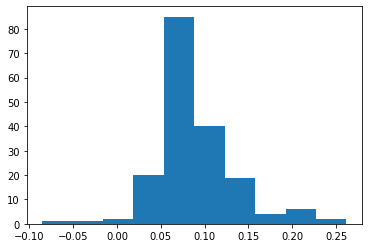

In [34]:
targ1 = growth_prof_df['pct_change_15_20']
plt.hist(targ1)

**BNB Merging data** **2015 into 2018**

Make a list of tuples and only check if the first matches add the tuple to the dictionary

In [ ]:
key_2018 = dict.fromkeys(pct_18.keys())
# key_2018

In [ ]:
#convert columns into dictionary, replace percent with percent estimate to match 2018 naming
key_2015 = list()
for key in pct_15.keys():
    key2 = key.replace("Percent", "Percent Estimate")
    key_tup = (key, key2)
    key_2015.append(key_tup)

In [ ]:
#here, are the remaining keys in 2015 the ones that are NOT in 2018? i.e. the non matching keys?
for key18 in key_2018:
  for key15 in key_2015:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015.remove(key15)

In [ ]:
len(key_2015)
#key_2015

157

In [ ]:
#changed 2015 to 2018 switch back if necessary
key_2015_v2 = list()
for key in key_2015:
  key2 = key[1].replace("2015", "2018")
  key_tup = (key[0], key2)
  key_2015_v2.append(key_tup)

In [ ]:
len(key_2015_v2)

157

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v2:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v2.remove(key15)

In [ ]:
len(key_2015_v2)

124

In [ ]:
# key_2015_v2

In [ ]:
# for key in key_2018:
#   if key_2018.get(key) == None:
#     # print(key)

In [ ]:
#changed here
key_2015_v3 = list()
for key in key_2015_v2:
  key2 = key[1].replace("One race", "Total population!!One race")
  key_tup = (key[0], key2)
  key_2015_v3.append(key_tup)

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v3:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v3.remove(key15)

In [ ]:
len(key_2015_v3)

102

In [ ]:
x =0
for key in key_2018:
  if key_2018.get(key) == None:
    if "Total population" in key:
      print(key)
      x+=1
print(x)  


Percent Estimate!!Race alone or in combination with one or more other races!!Total population
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Asian
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Black or African American
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Native Hawaiian and Other Pacific Islander
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!Some other race
Percent Estimate!!Race alone or in combination with one or more other races!!Total population!!White
Percent Estimate!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native
Percent Estimate!!RACE!!Total population!!Two or more races!!White and American 

In [ ]:
#changed here
key_2015_v4 = list()
for key in key_2015_v3:
  key2 = key[1].replace("SEX AND AGE", "SEX AND AGE!!Total population")
  key2 = key2.replace("Race alone or in combination with one or more other races", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("RACE!!Two", "RACE!!Total population!!Two")
  key_tup = (key[0], key2)
  key_2015_v4.append(key_tup)

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v4:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v4.remove(key15)

In [ ]:
len(key_2015_v4)

79

In [ ]:
x =0
for key in key_2018:
  if key_2018.get(key) == None:
    if "19 to 64" in key:
      print(key)
      x+=1
print(x)  
    

Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!No health insurance coverage
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!In labor force!!Employed!!With health insurance coverage
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 1

In [ ]:
# key_2015_v4

In [ ]:
#changed here
key_2015_v5 = list()
for key in key_2015_v4:
  key2 = key[1].replace("Civilian noninstitutionalized population 18 to 64 years", "Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years")
  key_tup = (key[0], key2)
  key_2015_v5.append(key_tup)

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v5:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v5.remove(key15)

In [ ]:
len(key_2015_v5)

60

In [ ]:
x =0
for key in key_2018:
  if key_2018.get(key) == None:
    if "All people" in key:
      print(key)
    x+=1
print(x)  

Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!

In [ ]:
# key_2015_v5

In [ ]:
#changed here
key_2015_v6 = list()
for key in key_2015_v5:
  key2 = key[1].replace("PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL", "PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people")
  key_tup = (key[0], key2)
  key_2015_v6.append(key_tup)

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v6:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v6.remove(key15)

In [ ]:
len(key_2015_v6)

55

In [ ]:
x =0
for key in key_2018:
  if key_2018.get(key) == None:
    # if "All people" in key:
    print(key)
    x+=1
print(x) 

Percent Estimate!!BEDROOMS!!Total housing units
Percent Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher
Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed
Percent Estimate!!GROSS RENT!!Occupied units paying rent!!No rent paid
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years
Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years!!No health insurance coverage
Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
Percent Estimate!!HOUSE

In [ ]:
# key_2015_v6

In [ ]:
#changed here
key_2015_v7 = list()
for key in key_2015_v6:
  key2 = key[1].replace("(IN 2018 INFLATION-ADJUSTED DOLLARS)", "(IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households")
  key2 = key2.replace("Race alone or in combination with one or more other races", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("IS BELOW THE POVERTY LEVEL!!All people", "IS BELOW THE POVERTY LEVEL!!All people!!18 years and over")
  key2 = key2.replace("RACE!!Race alone or in combination with one or more other races!!Total population!!Total population!!Total population", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("HOUSEHOLDS BY TYPE", "HOUSEHOLDS BY TYPE!!Total households")
  key2 = key2.replace("HOUSING OCCUPANCY", "HOUSING OCCUPANCY!!Total housing units")
  key2 = key2.replace("HOUSING TENURE", "HOUSING TENURE!!Occupied housing units")
  key2 = key2.replace("HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years", "HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years")
  key2 = key2.replace("IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over", "IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL")
  key2 = key2.replace("EDUCATIONAL ATTAINMENT!!Percent Estimate b", "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!B")
  key2 = key2.replace("EDUCATIONAL ATTAINMENT!!Percent Estimate h", "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!H")
  key2 = key2.replace("COMMUTING TO WORK", "COMMUTING TO WORK!!Workers 16 years and over")
  key2 = key2.replace("GROSS RENT!!", "GROSS RENT!!Occupied units paying rent!!")
  key2 = key2.replace("Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed", "Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed")
  key_tup = (key[0], key2)
  key_2015_v7.append(key_tup)

In [ ]:
for key18 in key_2018:
  for key15 in key_2015_v7:
    if key15[1] == key18:
      key_2018[key18] = key15
      key_2015_v7.remove(key15)

In [ ]:
len(key_2015_v7)

19

In [ ]:
x =0
for key in key_2018:
  if key_2018.get(key) == None:
    print(key)
    x+=1
print(x) 

Percent Estimate!!BEDROOMS!!Total housing units
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SEX AND AGE!!Total population!!16 years and over
Percent Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)
Percent Estimate!!SEX AND AGE!!Total population!!Under 18 years
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1989 and earlier
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 to

In [ ]:
key_2015_v7[0]

('Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!65 years and over',
 'Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL')

In [ ]:
# key_2018

In [ ]:
#This is to replace missing columns but actually just drop them when they dont join
for key in key_2018:
  if key_2018.get(key) == None:
    # key_2018[key] = (key,"No")
    print(key)

# x = [i for i in key_2018.values() if i == "No"]

Percent Estimate!!BEDROOMS!!Total housing units
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SEX AND AGE!!Total population!!16 years and over
Percent Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)
Percent Estimate!!SEX AND AGE!!Total population!!Under 18 years
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1989 and earlier
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 to

In [ ]:
#if want to change 18 to be like 15
# for column in pct_18.columns:
#   for key in key_2018.keys():
#     if key[0] == column:
#       pct_18=pct_18.rename(columns = {column:key[1]})
      
       

#Becca created new_pct_11 here, is that right??

In [ ]:
New_pct_18 = pct_18.copy()
New_pct_15 = pct_15.copy()
New_pct_11 = pct_11.copy()
New_key_2018 = key_2018.copy()
pct_18["Percent Estimate!!SEX AND AGE!!Total population!!16 years and over"]

0      89.7
1      77.8
2      83.4
3      80.5
4      80.9
       ... 
209    74.2
210    77.8
211    82.4
212    82.3
213    79.8
Name: Percent Estimate!!SEX AND AGE!!Total population!!16 years and over, Length: 214, dtype: object

In [ ]:
for key, value in key_2018.items():
  if str(type(value)) != "<class 'tuple'>":
    New_pct_18.drop(key, axis = 1, inplace = True)
    New_key_2018.pop(key, None)
    print(key)
  # print(type(value))

Percent Estimate!!BEDROOMS!!Total housing units
Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Not computed
Percent Estimate!!SEX AND AGE!!Total population!!16 years and over
Percent Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)
Percent Estimate!!SEX AND AGE!!Total population!!Under 18 years
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1989 and earlier
Percent Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2015 to

In [ ]:
# for key, value in New_key_2018.items():
#     print(value[0])
#   # print(type(value))

# FOR BECCA: This is where the column names for 15 are changed to match 18 and a new dataframe called New_pct_15 is created with the column names from 18

In [ ]:
#if want to change 15 to be like 18
for column in New_pct_15.columns:
  for key, value in New_key_2018.items():
    if value[0] == column:
      New_pct_15.rename(columns = {column:value[1]},inplace=True)
      
       

**BNB Merging data** **2011 into 2018**

In [ ]:
#if want to change 11 to be like 18
# for column in pct_11.columns:
#   for key in key_2018_11.keys():
#     if key[0] == column:
#       pct_11=pct_11.rename(columns = {column:key[1]})
      
       

In [ ]:
key_2018_11 = dict.fromkeys(pct_18.keys())

In [ ]:
key_2011 = list()
for key in pct_11.keys():
  key2 = key.replace("Percent", "Percent Estimate")
  key2 = key2.replace("2011", "2018")
  key2 = key2.replace("One race", "Total population!!One race")
  key2 = key2.replace("SEX AND AGE", "SEX AND AGE!!Total population")
  key2 = key2.replace("Race alone or in combination with one or more other races", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("RACE!!Two", "RACE!!Total population!!Two")
  key2 = key2.replace("Civilian noninstitutionalized population 18 to 64 years", "Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years")
  key2 = key2.replace("PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL", "PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people")
  key2 = key2.replace("(IN 2018 INFLATION-ADJUSTED DOLLARS)", "(IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households")
  key2 = key2.replace("Race alone or in combination with one or more other races", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("IS BELOW THE POVERTY LEVEL!!All people", "IS BELOW THE POVERTY LEVEL!!All people!!18 years and over")
  key2 = key2.replace("RACE!!Race alone or in combination with one or more other races!!Total population!!Total population!!Total population", "Race alone or in combination with one or more other races!!Total population")
  key2 = key2.replace("HOUSEHOLDS BY TYPE", "HOUSEHOLDS BY TYPE!!Total households")
  key2 = key2.replace("HOUSING OCCUPANCY", "HOUSING OCCUPANCY!!Total housing units")
  key2 = key2.replace("HOUSING TENURE", "HOUSING TENURE!!Occupied housing units")
  key2 = key2.replace("HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population under 18 years", "HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population under 19 years")
  key2 = key2.replace("IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over", "IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL")
  key2 = key2.replace("EDUCATIONAL ATTAINMENT!!Percent Estimate b", "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!B")
  key2 = key2.replace("EDUCATIONAL ATTAINMENT!!Percent Estimate h", "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!H")
  key2 = key2.replace("COMMUTING TO WORK", "COMMUTING TO WORK!!Workers 16 years and over")
  key2 = key2.replace("GROSS RENT!!", "GROSS RENT!!Occupied units paying rent!!")
  key2 = key2.replace("Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Not computed", "Percent Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed")
  key_tup = (key, key2)
  key_2011.append(key_tup)

for key18_11 in key_2018_11:
  for key11 in key_2011:
    if key11[1] == key18_11:
      key_2018_11[key18_11] = key11
      key_2011.remove(key11)

len(key_2011)

142

In [ ]:
#changed
key_2011_v2 = list()
for key in key_2011:
  key2 = key[1].replace("SELECTED MONTHLY OWNER COSTS (SMOC)!!", "SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing units with a mortgage!!")
  key2 = key2.replace("WORLD REGION OF BIRTH OF FOREIGN BORN!!", "WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!")
  key2 = key2.replace("SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!", "SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!")
  key2 = key2.replace("BEDROOMS!!", "BEDROOMS!!Total housing units!!")
  key_tup = (key[0], key2)
  key_2011_v2.append(key_tup)

for key18_11 in key_2018_11:
  for key11 in key_2011_v2:
    if key11[1] == key18_11:
      key_2018_11[key18_11] = key11
      key_2011_v2.remove(key11)

len(key_2011_v2)

137

In [ ]:
#changed
key_2011_v3 = list()
for key in key_2011_v2:
  key2 = key[1].replace("INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households", "INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)")
  key2 = key2.replace("UNITS IN STRUCTURE!!", "UNITS IN STRUCTURE!!Total housing units!!")
  key2 = key2.replace("VALUE!!", "VALUE!!Owner-occupied units!!")
  key2 = key2.replace("YEAR STRUCTURE BUILT!!", "YEAR STRUCTURE BUILT!!Total housing units!!")
  key2 = key2.replace("Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over", "Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people")
  key2 = key2.replace("Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!All families", "Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families")
  key2 = key2.replace("!!With related children", "!!With related children of the householder")
  key2 = key2.replace("!!Related children", "!!Related children of the householder")
  key2 = key2.replace("Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!", "Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!")
  key2 = key2.replace("Percent Estimate!!ROOMS!!", "Percent Estimate!!ROOMS!!Total housing units!!")
  key2 = key2.replace("!!SCHOOL ENROLLMENT!!", "!!SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!")
  key2 = key2.replace("RELATIONSHIP!!", "RELATIONSHIP!!Population in households!!")
  key2 = key2.replace("PLACE OF BIRTH!!", "PLACE OF BIRTH!!Total population!!")
  key2 = key2.replace("OCCUPANTS PER ROOM!!", "OCCUPANTS PER ROOM!!Occupied housing units!!")
  key2 = key2.replace("RESIDENCE 1 YEAR AGO!!", "RESIDENCE 1 YEAR AGO!!Population 1 year and over!!")
  key2 = key2.replace("INDUSTRY!!", "INDUSTRY!!Civilian employed population 16 years and over!!")
  key2 = key2.replace("HOUSE HEATING FUEL!!", "HOUSE HEATING FUEL!!Occupied housing units!!")
  key2 = key2.replace("!!FERTILITY!!Per 1,000 women 15 to 50 years old", "!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months")
  key2 = key2.replace("!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!", "!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!")
  key_tup = (key[0], key2)
  key_2011_v3.append(key_tup)

for key18_11 in key_2018_11:
  for key11 in key_2011_v3:
    if key11[1] == key18_11:
      key_2018_11[key18_11] = key11
      key_2011_v3.remove(key11)

len(key_2011_v3)

96

In [ ]:
#changed
key_2011_v4 = list()
for key in key_2011_v3:
  key2 = key[1].replace("Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL", "Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people")
  key2 = key2.replace("OCCUPATION!!", "OCCUPATION!!Civilian employed population 16 years and over!!")
  key2 = key2.replace("EDUCATIONAL ATTAINMENT!!", "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!")
  key2 = key2.replace("family!!With own children", "family!!With own children of the householder")
  key2 = key2.replace("!!HISPANIC OR LATINO AND RACE!!", "!!HISPANIC OR LATINO AND RACE!!Total population!!")
  key2 = key2.replace("!!VEHICLES AVAILABLE!!", "!!VEHICLES AVAILABLE!!Occupied housing units!!")
  key2 = key2.replace("!!GRANDPARENTS!!Responsible for grandchildren!!Years responsible for grandchildren!!", "!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!")
  key2 = key2.replace("!!GRANDPARENTS!!Who are female", "!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are female")
  key2 = key2.replace("!!GRANDPARENTS!!Who are married", "!!GRANDPARENTS!!Number of grandparents responsible for own grandchildren under 18 years!!Who are married")
  key2 = key2.replace("Percent Estimate!!GRANDPARENTS!!Responsible for grandchildren", "Percent Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Grandparents responsible for grandchildren")
  key2 = key2.replace("Percent Estimate!!HEALTH INSURANCE COVERAGE!!", "Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!")
  key_tup = (key[0], key2)
  key_2011_v4.append(key_tup)

for key18_11 in key_2018_11:
  for key11 in key_2011_v4:
    if key11[1] == key18_11:
      key_2018_11[key18_11] = key11
      key_2011_v4.remove(key11)
len(key_2011_v4)

89

In [ ]:
# #changed
key_2011_v5 = list()
for key in key_2011_v4:
  key2 = key[1].replace("Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!Civilian noninstitutionalized population 19 to 64 years!!", "Percent Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!")
  key2 = key2.replace("!!SELECTED CHARACTERISTICS!!", "!!SELECTED CHARACTERISTICS!!Occupied housing units!!")
  key2 = key2.replace("!!MORTGAGE STATUS!!", "!!MORTGAGE STATUS!!Owner-occupied units!!")
  key2 = key2.replace("!!HOUSEHOLDS BY TYPE!!Total households!!", "!!HOUSEHOLDS BY TYPE!!")
  key2 = key2.replace("Percent Estimate!!HOUSEHOLDS BY TYPE!!Family households (families)!!With own children under 18 years", "Percent Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Family households (families)!!With own children of the householder under 18 years")
  key2 = key2.replace("!!CLASS OF WORKER!!", "!!CLASS OF WORKER!!Civilian employed population 16 years and over!!")
  key2 = key2.replace("!!COMMUTING TO WORK!!Workers 16 years and over!!", "!!COMMUTING TO WORK!!")
  key2 = key2.replace("Percent Estimate!!FERTILITY!!", "Percent Estimate!!FERTILITY!!Number of women 15 to 50 years old who had a birth in the past 12 months!!")
  key2 = key2.replace("Percent Estimate!!HOUSING OCCUPANCY!!Total housing units!!Total housing units", "Percent Estimate!!HOUSING OCCUPANCY!!Total housing units")
  key2 = key2.replace("Percent Estimate!!HOUSING TENURE!!Occupied housing units!!Occupied housing units", "Percent Estimate!!HOUSING TENURE!!Occupied housing units")
  key2 = key2.replace("Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Mean family income (dollars)", "Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Mean family income (dollars)")
  key2 = key2.replace("Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median family income (dollars)", "Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Median family income (dollars)")
  key2 = key2.replace("Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Mean nonfamily income (dollars)", "Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Mean nonfamily income (dollars)")
  key2 = key2.replace("Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median nonfamily income (dollars)", "Percent Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Nonfamily households!!Median nonfamily income (dollars)")
  key2 = key2.replace("!!U.S. CITIZENSHIP STATUS!!", "!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!")
  key2 = key2.replace("Percent Estimate!!VETERAN STATUS!!Civilian veterans", "Percent Estimate!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans")
  # key2 = key2.replace("!!VEHICLES AVAILABLE!!", "!!VEHICLES AVAILABLE!!Occupied housing units!!")
  # key2 = key2.replace("!!VEHICLES AVAILABLE!!", "!!VEHICLES AVAILABLE!!Occupied housing units!!")
  # key2 = key2.replace("!!VEHICLES AVAILABLE!!", "!!VEHICLES AVAILABLE!!Occupied housing units!!")

  key_tup = (key[0], key2)
  key_2011_v5.append(key_tup)

for key18_11 in key_2018_11:
  for key11 in key_2011_v5:
    if key11[1] == key18_11:
      key_2018_11[key18_11] = key11
      key_2011_v5.remove(key11)
len(key_2011_v5)

67

# FOR BECCA: This is where 2011 has gotten to you can run the two cells below to see what is not yet merged.  With the first being 2018 and the second being 2011.

#2011 can be modified further if you so choose
#NEED HELP HERE PLEASE


In [ ]:
x =0
for key in key_2018_11:
  if key_2018_11.get(key) == None:
    if "" in key:
      print(key)
    x+=1
print(x) 

Percent Estimate!!BEDROOMS!!Total housing units!!1 bedroom
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer
Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability
Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate
Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force
Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force
Percent Estimate!!EMPLOYMEN

In [ ]:
key_2011
for i in key_2011_v5:
  if "" in i[1]:
    print(i[1])
  # if "Percent" in i:
  #   print(i)

Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!With a disability
Percent Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force
Percent Estimate!!EMPLOYMENT STATUS!!All parents in family in labor force
Percent Estimate!!EMPLOYMENT STATUS!!In labor force
Percent Estimate!!EMPLOYMENT STATUS!!In labor force
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Armed Forces
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Employed
Percent Estimate!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Unemployed
Percent Estimate!!EMPLOYMENT STATUS!!Not in labor force
Percent Estimate!!EMPLOYMENT STATUS!!Own children 6 to 17 years
Percent Estimate!!EMPLOYMENT STATUS!!Own children under 6

#Does not exist in 2011: Race,COMPUTER, INCOME AND BENEFITS
#ISSUES WITH: EMPLOYMENT STATUS, GROSS RENT, CITIZEN, DISABILITY STATUS, SELECTED MONTHLY OWNER COSTS, YEAR HOUSEHOLDER, YEAR STRUCTURE, MARITAL STATUS

# Big Issues SEX AND AGE

#aligns MARITAL STATUS

In [ ]:

x = 0
key_2011_v6 = list()
for key in key_2011_v5:
  if "MARITAL STATUS" in i[1] and x%2 == 0:
    key2 = key[1].replace("!!MARITAL STATUS!!", "!!MARITAL STATUS!!Females 15 years and over!!")
    x+=1
  elif "MARITAL STATUS" in i[1] and x%2 == 1:
    key2 = key[1].replace("!!MARITAL STATUS!!", "!!MARITAL STATUS!!Males 15 years and over!!")
    x+=1
  else:
    key2 = key[1]
    x+=1
  key_tup = (key[0], key2)
  key_2011_v6.append(key_tup)


In [ ]:
key_2011
for i in key_2011_v6:
  if "MARITAL STATUS" in i[1]:
    print(i[1])
  # if "Percent" in i:
  #   print(i)

In [ ]:
# #changed
# key_2011_v5 = list()
# for key in key_2011_v4:
#   key2 = key[1].replace("", "")
#   # key2 = key2.replace("UNITS IN STRUCTURE!!", "UNITS IN STRUCTURE!!Total housing units!!")

#   key_tup = (key[0], key2)
#   key_2011_v5.append(key_tup)

MASSIVE LOOP CHANGES

In [ ]:
# for key18_11 in key_2018_11:
#   for key11 in key_2011_v4:
#     if key11[1] == key18_11:
#       key_2018_11[key18_11] = key11
#       key_2011_v4.remove(key11)

In [ ]:
# len(key_2011_v4)

# BECCA and Toby: This is where the loop for new_pct_11 is created please ensure that it works
#The following three cells will make the new_pct_11 to be used in the cagr and the join at the end of the document

In [ ]:
New_pct_18_11 = pct_18.copy()
New_pct_15_11 = pct_15.copy()
New_key_2018_11 = key_2018_11.copy()

In [ ]:
for key, value in key_2018_11.items():
  if str(type(value)) != "<class 'tuple'>":
    New_pct_18_11.drop(key, axis = 1, inplace = True)
    New_key_2018_11.pop(key, None)
    print(key)
  # print(type(value))

Percent Estimate!!BEDROOMS!!Total housing units!!1 bedroom
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female
Percent Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription
Percent Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer
Percent Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability
Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate
Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force
Percent Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force
Percent Estimate!!EMPLOYMEN

In [ ]:
#if want to change 15 to be like 18
for column in New_pct_11.columns:
  for key, value in New_key_2018_11.items():
    if value[0] == column:
      New_pct_11.rename(columns = {column:value[1]},inplace=True)
      
       

df_cagr_10_15 = ((df_2015/df_2010) ** (1/5)) -1
df_cagr_15_20 = ((df_2020/df_2015) ** (1/5)) -1

fill with max column if infinity exists in the columns
if N/A due to zip drop them

**THEN **

Standard 15 plus the two above

Join Growth prof csv on index of zip code drop if zip codes.  Merge all together
Export to new csv 




# BNB JOIN and Other fun stuff

In [ ]:


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

#All the columns below beside the last one are filled with either -66666666666 or -88888888888
# for value in New_pct_18:
#   print(value)



In [ ]:
#SET VALUES TO FLOATS
New_pct_18 = New_pct_18.astype("float")
New_pct_15 = New_pct_15.astype("float")
New_pct_11 = New_pct_11.astype("float")
#DROP DUPLICATE COLUMNS MAINLY FOR ZIP
New_pct_18 = New_pct_18.loc[:,~New_pct_18.columns.duplicated()]
New_pct_15 = New_pct_15.loc[:,~New_pct_15.columns.duplicated()]
New_pct_11 = New_pct_11.loc[:,~New_pct_11.columns.duplicated()]
#SET INDEX TO ZIP
New_pct_18.set_index("zip", inplace=True)
New_pct_15.set_index("zip", inplace = True)
New_pct_11.set_index("zip", inplace = True)

In [ ]:
#2018
#figured out which columns were missing large chunks of data
#this cell was used to find the columns that had missing data and can be used to drop the columns eventually that are done above in the ugly way
list_of_times_too_are_missing = list()
for column in New_pct_18:
  list_of_zipcodes = list()
  for zipcode, value in zip(New_pct_18.index, New_pct_18[column]):
    if type(value)!= str:
      if value < 0:
        list_of_zipcodes.append(zipcode)
    if len(list_of_zipcodes) > 40:
      list_of_times_too_are_missing.append(column)
      break
list_of_times_too_are_missing

#Drop columns that have this extreme amount of -6666666666 and -8888888888
New_pct_18 = New_pct_18.drop(columns =list_of_times_too_are_missing, axis = 1)

In [ ]:
#2018
#out of the entire data set we have "corrupted data" that makes up 1176 out of roughly 140k data points which is less than 1% of the data.  We will replace those variables in the initial run with 0s just to test the models,
#these data points only exist in 35 out of the 212 zipcodes
# This replaces the missing values with 0

list_of_zipcodes = list()
for column in New_pct_18:
  for zipcode, value in zip(New_pct_18.index, New_pct_18[column]):
    if type(value)!= str:
      if value < 0:
        New_pct_18[column]= New_pct_18[column].replace(value, 0)
        # if zipcode not in list_of_zipcodes: 
        list_of_zipcodes.append(zipcode)

In [ ]:
#2015
#figured out which columns were missing large chunks of data
#this cell was used to find the columns that had missing data and can be used to drop the columns eventually that are done above in the ugly way
list_of_times_too_are_missing = list()
for column in New_pct_15:
  list_of_zipcodes = list()
  for zipcode, value in zip(New_pct_15.index, New_pct_15[column]):
    if type(value)!= str:
      if value < 0:
        list_of_zipcodes.append(zipcode)
    if len(list_of_zipcodes) > 40:
      list_of_times_too_are_missing.append(column)
      break
list_of_times_too_are_missing

#Drop columns that have this extreme amount of -6666666666 and -8888888888
New_pct_15 = New_pct_15.drop(columns =list_of_times_too_are_missing, axis = 1)

In [ ]:
#2015
#out of the entire data set we have "corrupted data" that makes up 1176 out of roughly 140k data points which is less than 1% of the data.  We will replace those variables in the initial run with 0s just to test the models,
#these data points only exist in 35 out of the 212 zipcodes
# This replaces the missing values with 0

list_of_zipcodes = list()
for column in New_pct_15:
  for zipcode, value in zip(New_pct_15.index, New_pct_15[column]):
    if type(value)!= str:
      if value < 0:
        New_pct_15[column]= New_pct_15[column].replace(value, 0)
        # if zipcode not in list_of_zipcodes: 
        list_of_zipcodes.append(zipcode)

In [ ]:
#2011
#figured out which columns were missing large chunks of data
#this cell was used to find the columns that had missing data and can be used to drop the columns eventually that are done above in the ugly way
list_of_times_too_are_missing = list()
for column in New_pct_11:
  list_of_zipcodes = list()
  for zipcode, value in zip(New_pct_11.index, New_pct_11[column]):
    if type(value)!= str:
      if value < 0:
        list_of_zipcodes.append(zipcode)
    if len(list_of_zipcodes) > 40:
      list_of_times_too_are_missing.append(column)
      break
list_of_times_too_are_missing

#Drop columns that have this extreme amount of -6666666666 and -8888888888
New_pct_11 = New_pct_11.drop(columns =list_of_times_too_are_missing, axis = 1)

In [ ]:
#2011
#out of the entire data set we have "corrupted data" that makes up 1176 out of roughly 140k data points which is less than 1% of the data.  We will replace those variables in the initial run with 0s just to test the models,
#these data points only exist in 35 out of the 212 zipcodes
# This replaces the missing values with 0

list_of_zipcodes = list()
for column in New_pct_11:
  for zipcode, value in zip(New_pct_11.index, New_pct_11[column]):
    if type(value)!= str:
      if value < 0:
        New_pct_11[column]= New_pct_11[column].replace(value, 0)
        # if zipcode not in list_of_zipcodes: 
        list_of_zipcodes.append(zipcode)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# FOR BECCA/TOBY: DO THE OTHER CAGR

In [ ]:
df_cagr_15_20 = ((New_pct_18.divide(New_pct_15))** (1/5)) -1
df_cagr_10_15 = ((New_pct_15.divide(New_pct_11))** (1/5)) -1

#drop all columns with null values (should be the columns that are only in 2015, not 2011)
df_cagr_15_20.isna().sum()
df_cagr_10_15.isna().sum()
df_cagr_15_20 = df_cagr_15_20.dropna(axis = 1)
df_cagr_10_15 = df_cagr_10_15.dropna(axis = 1)

In [ ]:
df_cagr_10_15.isna().sum()

Series([], dtype: float64)

In [ ]:
#TEST FOR LOOKING AT KEYS ITS GARBAGE
# test_18 = list()
# test_15 = list()
# for key in New_pct_15.keys():
#   test_18.append(key)

# for key in New_pct_15.keys():
#   test_15.append(key)

# for key_18 in test_18:
#   for key_15 in test_15:
#     if key_15 in key_18:
#       # test_18.remove(key_15)
#       test_15.remove(key_15)

# test_15

#FOR BECCA: This is where I tried to pull the growth_prof.csv but cant for some reason
#NEED HELP HERE PLEASE

In [ ]:



# df = pd.read_csv('/content/drive/My Drive/AML_project/growth_prof.csv')
growth_prof_df = pd.read_csv('/content/drive/MyDrive/Processed Data/AML_project/growth_prof.csv')



#FOR BECCA and Toby this is where the join happens modify as you see fit with new joins

In [ ]:
print(New_pct_15.shape)
print(New_pct_11.shape)
New_pct_15.head()
#print(growth_prof_df.head())
growth_prof_df = growth_prof_df.reset_index()
growth_prof_df = growth_prof_df.rename(columns={"Unnamed: 0": "zip"})
growth_prof_df.head()

In [ ]:
merged_df_15_cagr = merged_df_15.merge(df_cagr_10_15, left_on="zip", right_on='zip', suffixes=("_15", "_cagr"))
merged_df_15_cagr.shape

In [ ]:
merged_df_15

Output hidden; open in https://colab.research.google.com to view.

# BECCA/TOBY
#Uncomment the following line when ready to export to csv

In [ ]:
#merged_df_15.to_csv("Full_merge_.csv", index = False)